In [2]:
from SALib import ProblemSpec
from SALib.test_functions import Ishigami
import numpy as np

import matplotlib.pyplot as plt

### Notes
`sp`: ProblemSpec object

`sp.sample_[name of method]` \
`sp.sample(my_sampler, *args, **kwargs)` \
`sp.analyze_[name of method]`

### To evalute models: 
https://salib.readthedocs.io/en/latest/user_guide/basics_with_interface.html#running-a-model 

`sp.evaluate(my_model)`\
`my_model` should accept numpy array as input in first position

OR 

```
Y = np.zeros([param_values.shape[0]])

for i, X in enumerate(param_values):
    Y[i] = evaluate_model(X)

# Provide the results to the interface
sp.set_results(Y)
```

# Sobol Indices

* S1: variations of a single input alone
* ST: variations of joint inputs (inputs interacting with each other)
* Greater $S_i$ means  “uncertainty in the input variable $i$ has a larger effect on the variance of the output” 

* larger scale/inputs means FINISHHH

Graph indicates: ? 
* X2 has the most individual impact on uncertainty 
* X1 has the most impact on uncertainty considering itself and combined with other input factors

Samples:
	3 parameters: ['x1', 'x2', 'x3']
	8192 samples
Outputs:
	1 outputs: ['Y']
	8192 evaluations
Analysis:
          ST   ST_conf
x1  0.553448  0.089039
x2  0.442033  0.042886
x3  0.240750  0.025633
          S1   S1_conf
x1  0.313069  0.056709
x2  0.442473  0.058659
x3  0.007156  0.052263
                S2   S2_conf
(x1, x2)  0.008756  0.077739
(x1, x3)  0.244761  0.105778
(x2, x3) -0.005972  0.064534



/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


<Axes: title={'center': 'Sobol Indices'}>

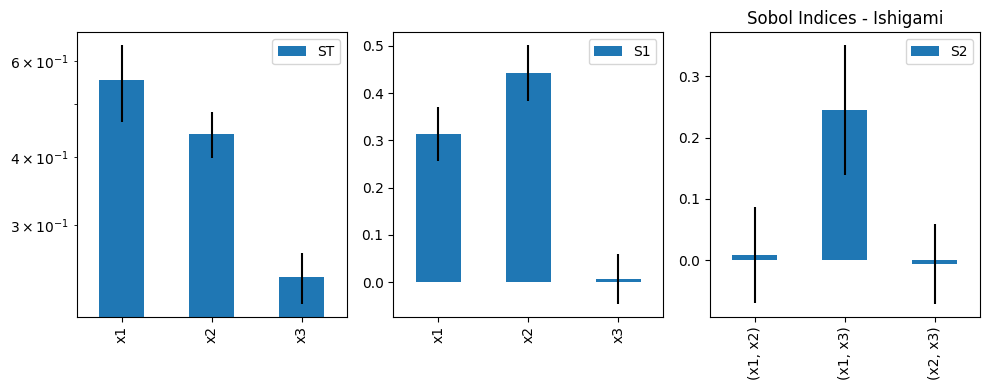

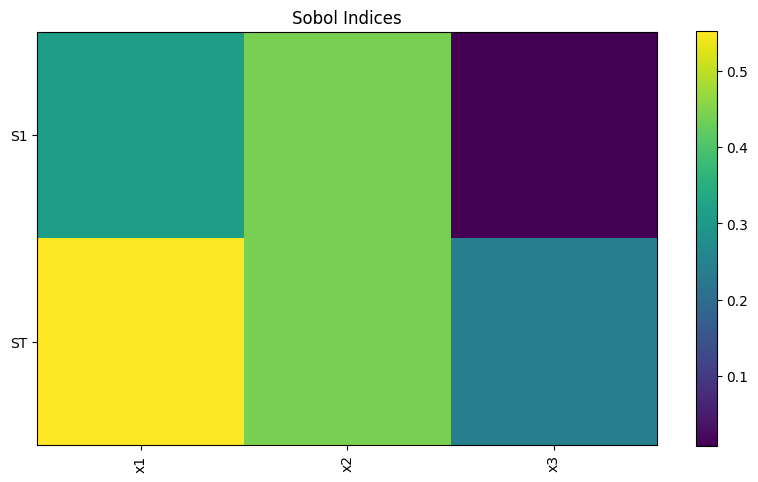

In [62]:
# ==== Sobol Indices ~ Ishigami ===

# define model inputs 
sp = ProblemSpec({
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359]]
})

# generate sample, evaluate mode, find sobol indices 
(sp.sample_sobol(1024).evaluate(Ishigami.evaluate).analyze_sobol())

# information from .analyze stored in sp, data handled as numpy array
X = sp.samples
y = sp.results
S = sp.analysis

print(sp)

total_Si, first_Si, second_Si = sp.to_df() # convert to pandas dataframe object

# === Plotting results ===
axes = sp.plot() #  returns matplotlib axes object
axes[0].set_yscale('log') # set plot to log scale
fig = plt.gcf() # get current figure
fig.set_size_inches(10, 4)
plt.title(label="Sobol Indices - Ishigami")
plt.tight_layout() 

sp.heatmap(title="Sobol Indices")

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	8 parameters: ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']
	10240 samples
Outputs:
	1 outputs: ['Y']
	10240 evaluations
Analysis:
          ST   ST_conf
x1  0.785812  0.083168
x2  0.241958  0.030178
x3  0.035408  0.004784
x4  0.010452  0.001259
x5  0.000105  0.000013
x6  0.000106  0.000013
x7  0.000107  0.000015
x8  0.000104  0.000014
          S1   S1_conf
x1  0.720714  0.070674
x2  0.172800  0.043229
x3  0.026503  0.014910
x4  0.012086  0.009512
x5 -0.000031  0.000930
x6 -0.000146  0.000982
x7  0.000298  0.000951
x8 -0.000081  0.000973



/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


<Axes: title={'center': 'Sobol Indices'}>

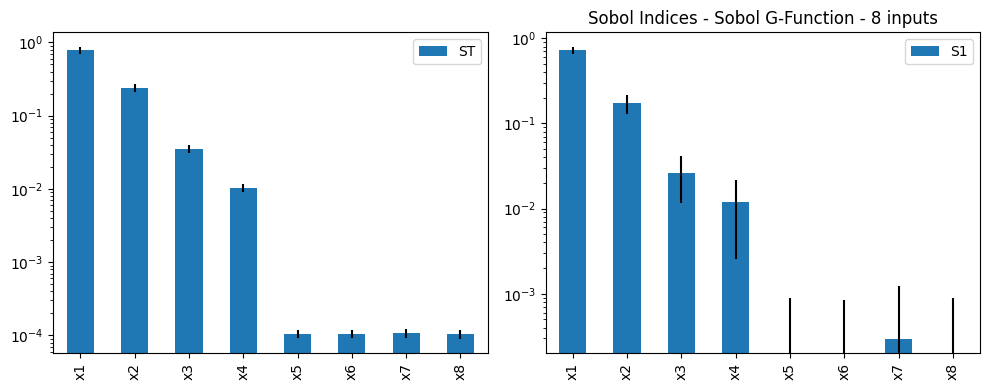

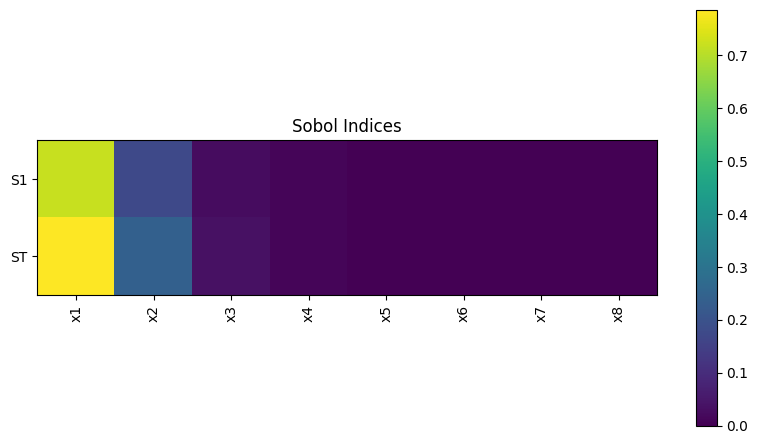

In [63]:
# ==== Sobol Indices ~ Sobol G-Function (8 inputs)===
from SALib.test_functions import Sobol_G

# define model inputs 
sp = ProblemSpec({
    'num_vars': 8,
    'names': ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8'],
    'bounds': [[0,1]] * 8
})

# generate sample, evaluate mode, find sobol indices 
(sp.sample_sobol(1024, calc_second_order=False).evaluate(Sobol_G.evaluate).analyze_sobol(calc_second_order=False))

print(sp)

total_Si, first_Si = sp.to_df() # convert to pandas dataframe object

# === Plotting results ===
axes = sp.plot() #  returns matplotlib axes object
axes[0].set_yscale('log') # set plot to log scale
axes[1].set_yscale('log') # set plot to log scale
fig = plt.gcf() # get current figure
fig.set_size_inches(10, 4)
plt.title(label="Sobol Indices - Sobol G-Function - 8 inputs")
plt.tight_layout()

sp.heatmap(title="Sobol Indices")

In [65]:
# ==== Sobol Indices ~ Sobol G-Function ===
from SALib.test_functions import Sobol_G

def si_sobol_g(n:int, sp:ProblemSpec, a_arr=[], delta_arr=[]):

    # generate sample, evaluate mode, find sobol indices 
    (sp.sample_sobol(1024, calc_second_order=False).evaluate(
        Sobol_G.evaluate, a=np.array(a_arr), delta=np.array(delta_arr)
        ).analyze_sobol(calc_second_order=False))

    # information from .analyze stored in sp, data handled as numpy array
    X = sp.samples
    y = sp.results
    S = sp.analysis

    print(sp)

    total_Si, first_Si = sp.to_df() # convert to pandas dataframe object

    # === Plotting results ===
    axes = sp.plot() #  returns matplotlib axes object
    axes[0].set_yscale('log') # set plot to log scale
    axes[1].set_yscale('log') # set plot to log scale
    fig = plt.gcf() # get current figure
    fig.set_size_inches(40, 4)
    plt.title(label=f"Sobol Indices - Sobol G Function - {n} inputs")
    plt.tight_layout()

    sp.heatmap(title=f"Sobol Indices - {n} inputs ")

# Method of Morris

* $\sigma$
    * standard deviation of elementary effect
    * measures interaction between factors
    * distribution of sensitivity measures
    * Greater $\sigma$ means higher interaction with input factors

* $\mu$
    * measures overall effect of the factor on the output

* $\mu^*$
    * used to rank factors in order of importance, absolute value
    * use with few influential factors, majority non-influential factors
    * Greater $\mu^*$ means higher sensitivity???  

Graph indicates: ?
* x1 - monotonic
* x2 - linear
* x3 - linear

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	3 parameters: ['x1', 'x2', 'x3']
	4000 samples
Outputs:
	1 outputs: ['Y']
	4000 evaluations
Analysis:
          mu   mu_star     sigma  mu_star_conf
x1  7.854025  7.854025  6.250122  3.879933e-01
x2  0.157500  7.875000  7.877365  4.008763e-15
x3  0.462411  6.261294  8.838291  3.654460e-01



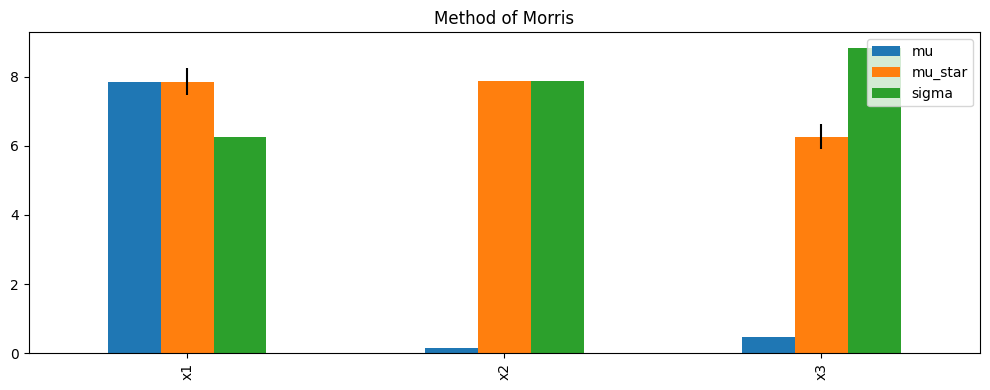

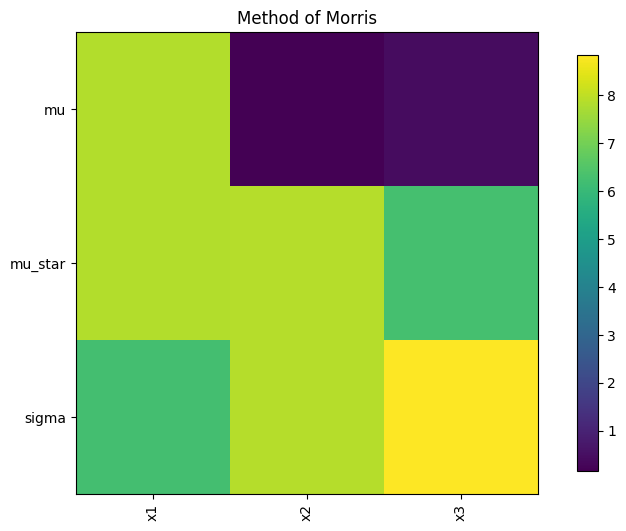

In [10]:
# ==== Method of Morris ~ Ishigami ===
# from SALib.analyze import morris

# define model inputs 
sp = ProblemSpec({
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359]]
})

# TODO there's lots of options for sampling 
# SALib.sample.morris.morris module https://salib.readthedocs.io/en/latest/api/SALib.sample.morris.html#module-SALib.sample.morris.morris
# https://salib.readthedocs.io/en/latest/api/SALib.analyze.html#module-SALib.analyze.morris (example code that didn't work)

def morris(n : int):
    (sp.sample_morris(1000).evaluate(Ishigami.evaluate).analyze_morris())
    print(sp)

    df_morris = sp.to_df() # convert to pandas dataframe object

    # === Plotting results ===
    axes = sp.plot() #  returns matplotlib axes object
    fig = plt.gcf() # get current figure
    fig.set_size_inches(10, 4)
    plt.title(label=f"Method of Morris")
    plt.tight_layout()

    sp.heatmap(title="Method of Morris")

morris(10)
# morris(100)
# morris(1000)

In [11]:
# ==== Method of Morris ~ Sobol G-Function ===
from SALib.test_functions import Sobol_G

def morris_sobol_g(n:int, sp:ProblemSpec, a_arr=[], delta_arr=[]):
    # generate sample, evaluate mode, find sobol indices 
    (sp.sample_morris(1024).evaluate(
        Sobol_G.evaluate, a=np.array(a_arr), delta=np.array(delta_arr)
        ).analyze_morris())
    

    print(sp)

    # === Plotting results ===
    axes = sp.plot() #  returns matplotlib axes object
    axes.set_yscale('log') # set plot to log scale
    fig = plt.gcf() # get current figure
    fig.set_size_inches(40, 4)
    plt.title(label=f"Method of Morris - Sobol G Function - {n} inputs")
    plt.tight_layout()

    sp.heatmap(title=f"Method of Morris - {n} inputs")

# morris_sobol_g(40)

# RBD-FAST

https://arxiv.org/html/2406.16975v1


*RBD-FAST vs FAST*
* FAST uses different frequencies for each parameter 
* RBD-FAST uses a single frequency
<!-- <br / -->
* The more inputs, the more costly FAST
* RBD-FAST has less computation 
<!-- <br / -->
* RBD-FAST only looks at first indice
* S1: variations of a single input alone



{'S1': [0.30628938676800155, 0.41126115576085653, -0.005092542135785003], 'S1_conf': [0.05954461011541908, 0.06565490757689918, 0.03424784361351224], 'names': ['x1', 'x2', 'x3']}


/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


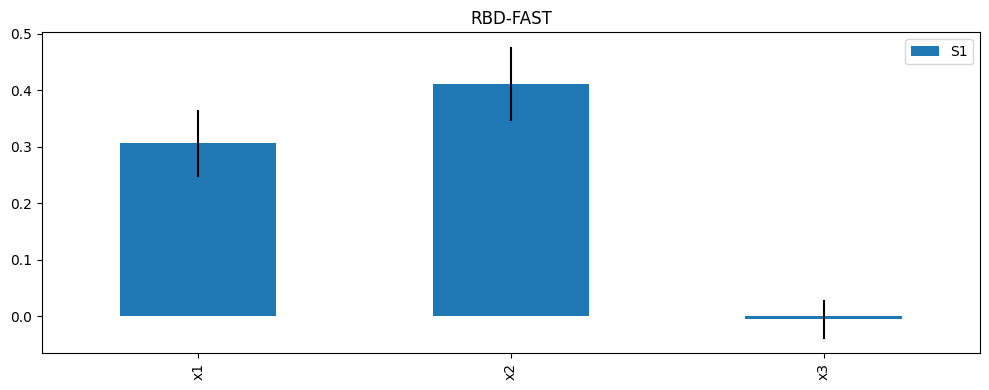

In [3]:
# ==== RBD-FAST ~ Ishigami ===
from SALib.sample import latin
from SALib.analyze import rbd_fast

# define model inputs 
sp = ProblemSpec({
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359]]
})

X = latin.sample(sp, 1000)
Y = Ishigami.evaluate(X)
sp = rbd_fast.analyze(sp, X, Y, print_to_console=False)
print(sp)

df_rbd_fast = sp.to_df() # convert to pandas dataframe object

# === Plotting results ===
axes = sp.plot() #  returns matplotlib axes object
# axes.set_yscale('log') # set plot to log scale
fig = plt.gcf() # get current figure
fig.set_size_inches(10, 4)
plt.title(label="RBD-FAST")
plt.tight_layout()

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Samples:
	3 parameters: ['x1', 'x2', 'x3']
	1000 samples
Outputs:
	1 outputs: ['Y']
	1000 evaluations
Analysis:
          S1   S1_conf
x1  0.333300  0.053697
x2  0.459066  0.066155
x3  0.009869  0.047161



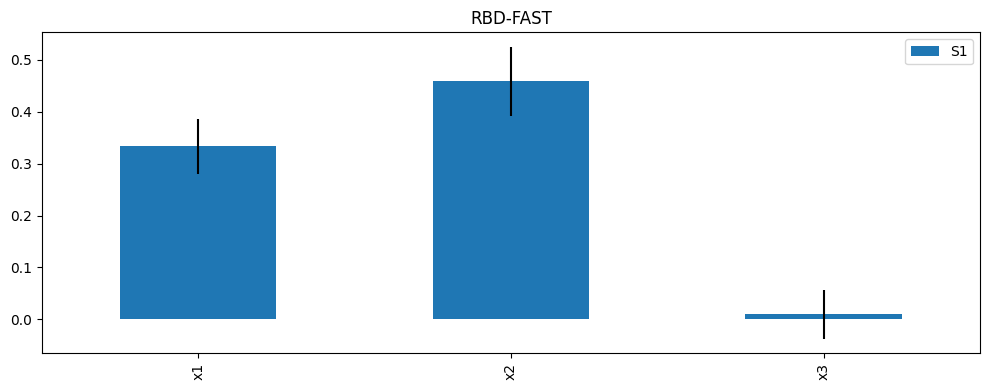

In [5]:
# ==== RBD-FAST ~ Ishigami ===
# from SALib.sample import latin
# from SALib.analyze import rbd_fast

# define model inputs 
sp = ProblemSpec({
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359]]
})

# TODO ??? any sample 
(sp.sample_latin(1000).evaluate(Ishigami.evaluate).analyze_rbd_fast())
print(sp)

df_rbd_fast = sp.to_df() # convert to pandas dataframe object

# === Plotting results ===
axes = sp.plot() #  returns matplotlib axes object
# axes.set_yscale('log') # set plot to log scale
fig = plt.gcf() # get current figure
fig.set_size_inches(10, 4)
plt.title(label="RBD-FAST")
plt.tight_layout()

In [6]:
# ==== RBD-FAST ~ Sobol G-Function ===
from SALib.test_functions import Sobol_G

def rbd_fast_sobol_g(n:int, sp:ProblemSpec, a_arr=[], delta_arr=[]):
    (sp.sample_latin(1024).evaluate(
        Sobol_G.evaluate, a=np.array(a_arr), delta=np.array(delta_arr)
        ).analyze_rbd_fast())    

    print(sp)

    # === Plotting results ===
    axes = sp.plot() #  returns matplotlib axes object
    # axes.set_yscale('log') # set plot to log scale
    fig = plt.gcf() # get current figure
    fig.set_size_inches(40, 4)
    plt.title(label=f"RBD-FAST - Sobol G Function - {n} inputs")
    plt.tight_layout()

# rbd_fast_sobol_g(40)

# FAST

(Fourier amplitude sensitivity test) \
*How it works?*
* Periodic sample search
* Uses period search function
* Applies decomposition of variance based on Fourier Transform 

*Purpose*
* Describes decomposition of variance using transfer functions 

*Attributes*
* Nonlinear, nonmonotonic models 
---
* S1: variations of a single input alone
* ST: variations of joint inputs (inputs interacting with each other)
* Greater $S_i$ means  “uncertainty in the input variable $i$ has a larger effect on the variance of the output” 

Samples:
	3 parameters: ['x1', 'x2', 'x3']
	3000 samples
Outputs:
	1 outputs: ['Y']
	3000 evaluations
Analysis:
              S1        ST   S1_conf   ST_conf
x1  2.976338e-01  0.533087  0.015542  0.042560
x2  4.420844e-01  0.469327  0.019882  0.039642
x3  3.055817e-28  0.239227  0.016170  0.040175



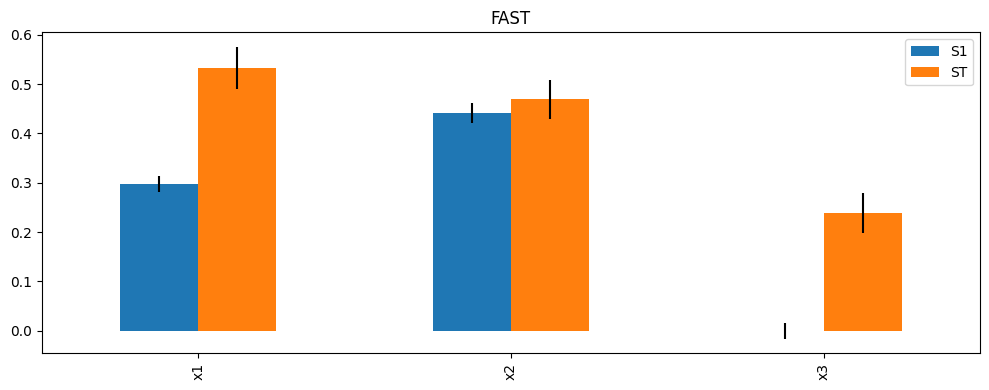

In [118]:
# ==== FAST ~ Ishigami ===
# from SALib.analyze import fast

# define model inputs 
sp = ProblemSpec({
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               
               [-3.14159265359, 3.14159265359]]
})

(sp.sample_fast(1000).evaluate(Ishigami.evaluate).analyze_fast())
print(sp)

df_fast = sp.to_df() # convert to pandas dataframe object

# === Plotting results ===
axes = sp.plot() #  returns matplotlib axes object
# axes.set_yscale('log') # set plot to log scale
fig = plt.gcf() # get current figure
fig.set_size_inches(10, 4)
plt.title(label="FAST")
plt.tight_layout()

In [7]:
# ==== FAST ~ Sobol G-Function ===
from SALib.test_functions import Sobol_G

def fast_sobol_g(n:int, sp:ProblemSpec, a_arr=[], delta_arr=[]):
    (sp.sample_fast(1024).evaluate(
        Sobol_G.evaluate, a=np.array(a_arr), delta=np.array(delta_arr)
        ).analyze_fast())    

    print(sp)

    # === Plotting results ===
    axes = sp.plot() #  returns matplotlib axes object
    # axes.set_yscale('log') # set plot to log scale
    fig = plt.gcf() # get current figure
    fig.set_size_inches(40, 4)
    plt.title(label=f"FAST - Sobol G Function - {n} inputs")
    plt.tight_layout()

#fast_sobol_g(40)

# Delta Moment-Independent 

Moment-Independent: "assess senitivities based on the entire probability distribution"

https://arxiv.org/html/2406.16975v1 \
*How it works?*
* Assume all input factors indepenent (can still be used with correlated variables)
* "Shift $s$ between unconditional density of $Y (f_y(y))$ and the conditional density of $Y$ given one variable $X_i$ is fixed with a constant value $x$.

$$E_{X_i}[s(X_i)] = \int_x f_{X_i}(x_i) [\int_y | f_Y(y) - f_{Y|X_i} (y)|dy]dX_i $$
$$S_i = \frac{1}{2} E_{X_i}[s(X_i)]$$

https://uc-ebook.org/docs/html/3_sensitivity_analysis_the_basics.html#moment-independent-density-based-methods \
*Purpose*
* Used when want to look at entire distribution of events


* Delta: expected value
* $S_i$ represents "normalized expected shift in distribution of $y$ provoked by $x_i$
    * Variations of a single input alone

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Samples:
	3 parameters: ['x1', 'x2', 'x3']
	1000 samples
Outputs:
	1 outputs: ['Y']
	1000 evaluations
Analysis:
       delta  delta_conf        S1   S1_conf
x1  0.200628    0.019256  0.262685  0.048338
x2  0.267366    0.021260  0.261986  0.042827
x3  0.170937    0.019714  0.006045  0.009880



/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


<Axes: title={'center': 'Delta'}>

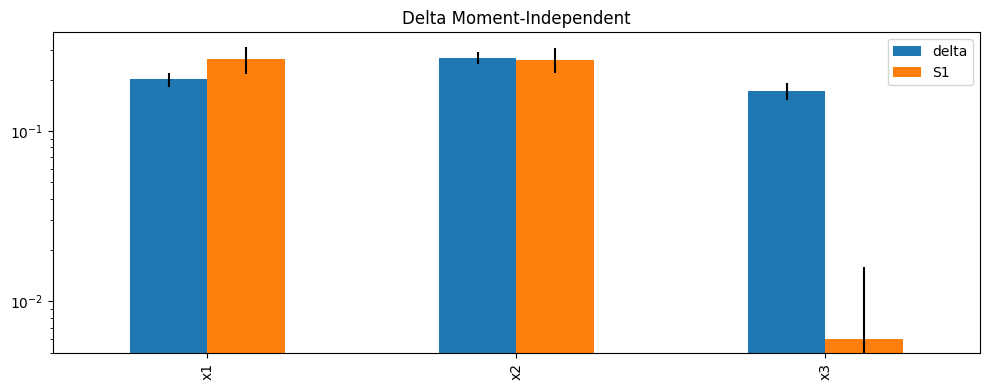

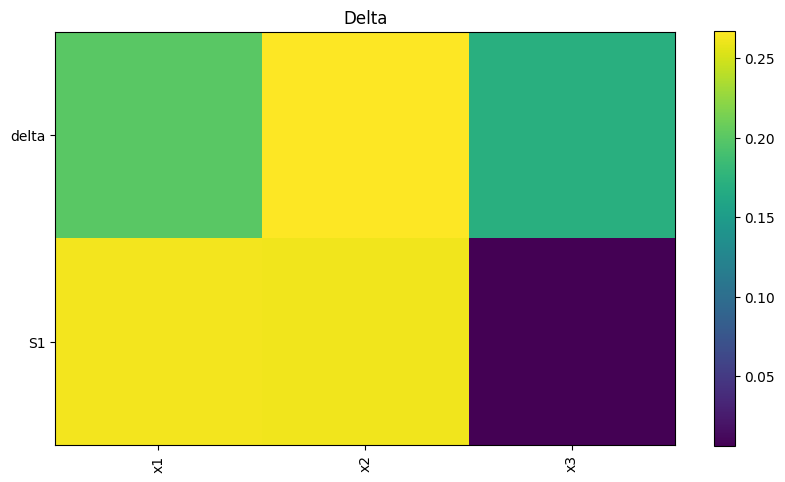

In [86]:
# ==== Delta Moment-Independent ~ Ishigami ===

# define model inputs 
sp = ProblemSpec({
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359]]
})

# TODO ?? any sample
(sp.sample_latin(1000).evaluate(Ishigami.evaluate).analyze_delta())
print(sp)

df_delta = sp.to_df() # convert to pandas dataframe object

# === Plotting results ===
axes = sp.plot() #  returns matplotlib axes object
axes.set_yscale('log') # set plot to log scale
fig = plt.gcf() # get current figure
fig.set_size_inches(10, 4)
plt.title(label="Delta Moment-Independent")
plt.tight_layout()

sp.heatmap(title=f"Delta")

In [70]:
# ==== Delta Moment-Independent ~ Sobol G-Function ===
from SALib.test_functions import Sobol_G

def delta_sobol_g(n:int, sp:ProblemSpec, a_arr=[], delta_arr=[]):
    (sp.sample_latin(1024).evaluate(
        Sobol_G.evaluate, a=np.array(a_arr), delta=np.array(delta_arr)
        ).analyze_delta())    

    print(sp)

    # === Plotting results ===
    axes = sp.plot() #  returns matplotlib axes object
    axes.set_yscale('log') # set plot to log scale
    fig = plt.gcf() # get current figure
    fig.set_size_inches(40, 4)
    plt.title(label=f"Delta Moment-Independent - Sobol G Function - {n} inputs")
    plt.tight_layout()
    sp.heatmap(title=f"Delta Moment-Independent - {n} inputs")

# delta_sobol_g(40)

# DGSM

Derivative-based Global Sensitivity Measure (DGSM)
* Averaging local derivatives 

* vi: first order
* dgsm: total order

Samples:
	3 parameters: ['x1', 'x2', 'x3']
	4000 samples
Outputs:
	1 outputs: ['Y']
	4000 evaluations
Analysis:
           vi     vi_std      dgsm  dgsm_conf
x1   7.733127  16.435227  2.243290   0.935343
x2  24.375341  17.356755  7.071002   1.232457
x3  11.348873  24.401096  3.292176   1.622116



/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


<Axes: title={'center': 'DGSM'}>

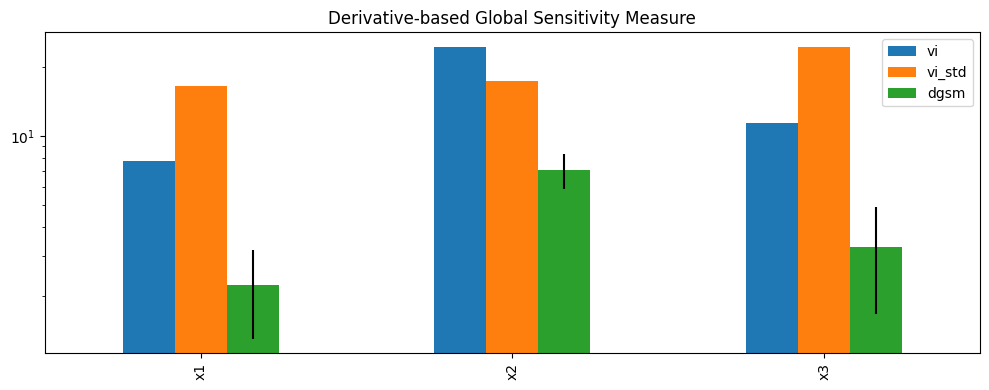

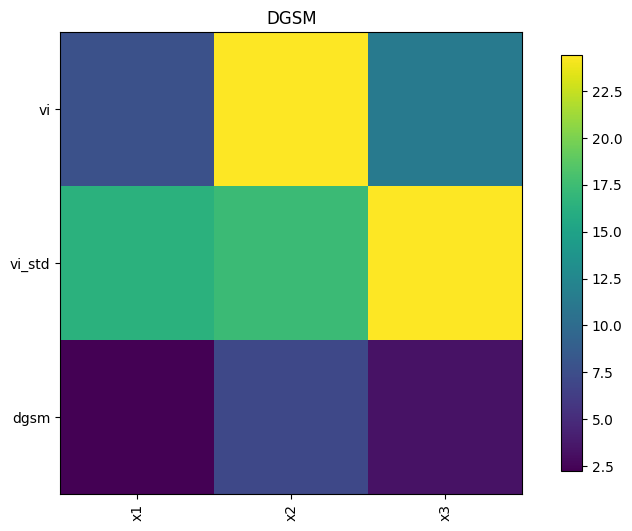

In [35]:
# ==== Derivative-based Global Sensitivity Measure (DGSM) ~ Ishigami ===

# define model inputs 
sp = ProblemSpec({
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359]]
})

(sp.sample_finite_diff(1000).evaluate(Ishigami.evaluate).analyze_dgsm())
print(sp)

df_delta = sp.to_df() # convert to pandas dataframe object

# === Plotting results ===
axes = sp.plot() #  returns matplotlib axes object
axes.set_yscale('log') # set plot to log scale
fig = plt.gcf() # get current figure
fig.set_size_inches(10, 4)
plt.title(label="Derivative-based Global Sensitivity Measure")
plt.tight_layout()

sp.heatmap(title="DGSM")

In [71]:
# ==== Derivative-based Global Sensitivity Measure (DGSM) ~ Sobol G-Function ===
from SALib.test_functions import Sobol_G

def dgsm_sobol_g(n:int, sp:ProblemSpec, a_arr=[], delta_arr=[]):
    (sp.sample_finite_diff(1024).evaluate(
        Sobol_G.evaluate, a=np.array(a_arr), delta=np.array(delta_arr)
        ).analyze_dgsm())    

    print(sp)

    # === Plotting results ===
    axes = sp.plot() #  returns matplotlib axes object
    axes.set_yscale('log') # set plot to log scale
    fig = plt.gcf() # get current figure
    fig.set_size_inches(40, 4)
    plt.title(label=f"DGSM - Sobol G Function - {n} inputs")
    plt.tight_layout()
    sp.heatmap(title=f"DGSM - {n} inputs")

# dgsm_sobol_g(40)

# Fractional Factorial

* ME: main effect
* IE: interaction effect - interactions between input variables

Samples:
	4 parameters: ['x1', 'x2', 'x3', 'dummy_0']
	8 samples
Outputs:
	1 outputs: ['Y']
	8 evaluations
Analysis:
                   ME
x1      -2.221468e-12
x2       0.000000e+00
x3       0.000000e+00
dummy_0  0.000000e+00
                IE
(x1, x2)       0.0
(x1, x3)       0.0
(x2, x3)       0.0
(x1, dummy_0)  0.0
(x2, dummy_0)  0.0
(x3, dummy_0)  0.0



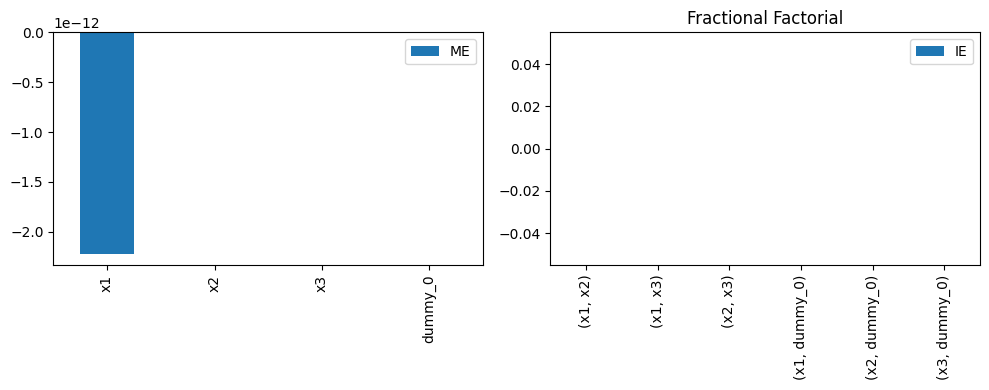

In [17]:
# ==== Fractional Factorial ~ Ishigami ===

# define model inputs 
sp = ProblemSpec({
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359]]
})

(sp.sample_ff(1000).evaluate(Ishigami.evaluate).analyze_ff(second_order=True))
print(sp)

df_ff = sp.to_df() # convert to pandas dataframe object

# === Plotting results ===
axes = sp.plot() #  returns matplotlib axes object
fig = plt.gcf() # get current figure
fig.set_size_inches(10, 4)
plt.title(label="Fractional Factorial")
plt.tight_layout()


In [ ]:
# ==== Derivative-based Global Sensitivity Measure (DGSM) ~ Sobol G-Function ===
from SALib.test_functions import Sobol_G

def ff_sobol_g(n, a_arr=[], delta_arr=[]):
    names_arr = []
    for i in range(n):
        param = 'x' + str(i)
        names_arr.append(param)

    if len(a_arr) == 0 and len(delta_arr) == 0:
        for i in range(n):
            a_arr.append(9)
            delta_arr.append(1)

    # define model inputs 
    sp = ProblemSpec({
        'num_vars': n,
        'names': names_arr,
        'bounds': [[0,1]] * n 
    })

    (sp.sample_ff(1024).evaluate(
        Sobol_G.evaluate, a=np.array(a_arr), delta=np.array(delta_arr)
        ).analyze_ff(second_order=True))    

    print(sp)

    # === Plotting results ===
    axes = sp.plot() #  returns matplotlib axes object
    fig = plt.gcf() # get current figure
    fig.set_size_inches(40, 4)
    plt.title(label=f"Fractional Factorial - Sobol G Function - {n} inputs")
    plt.tight_layout()

ff_sobol_g(64)

# PAWN

* Moment-independent 

*How does it work?*
* Looks at distribution of model outputs instead of variation 
* Characterizes outputs with cumulative distribution function (CDF)
* "Characterizes the relationship between inputs and outputs by quantifying the variation in the output distributions after conditioning an input"

*Purpose*
* Used for low sample sizes 
* Used for factor ranking and screening

---
* CV: coefficient of variation - indicates level of variability
    * closer to zero - lower variation  


Samples:
	3 parameters: ['x1', 'x2', 'x3']
	1000 samples
Outputs:
	1 outputs: ['Y']
	1000 evaluations
Analysis:
    minimum      mean  median   maximum        CV
x1    0.177  0.250800  0.2635  0.319000  0.229229
x2    0.171  0.358529  0.3855  0.530000  0.320920
x3    0.080  0.128223  0.1145  0.245232  0.366249



/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


<Axes: title={'center': 'PAWN'}>

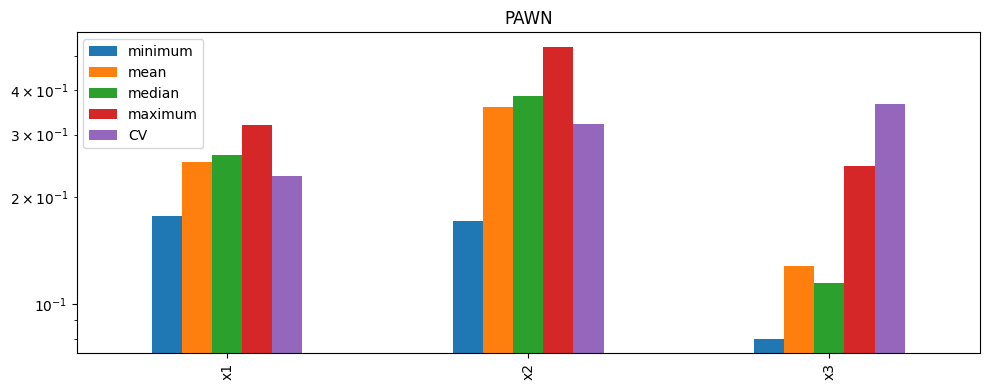

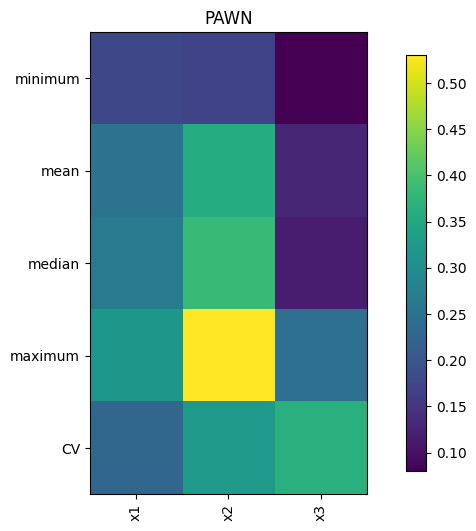

In [87]:
# ==== PAWN ~ Ishigami ===
# explores distribution of model outputs instead of variation 
# characterizes by cumulative distribution function instead of probability distribution function

# define model inputs 
sp = ProblemSpec({
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359]]
})

# any sample
(sp.sample_latin(1000).evaluate(Ishigami.evaluate).analyze_pawn())
print(sp)

df_delta = sp.to_df() # convert to pandas dataframe object

# === Plotting results ===
axes = sp.plot() #  returns matplotlib axes object
axes.set_yscale('log') # set plot to log scale
fig = plt.gcf() # get current figure
fig.set_size_inches(10, 4)
plt.title(label="PAWN")
plt.tight_layout()

sp.heatmap(title="PAWN")

In [74]:
# ==== PAWN ~ Sobol G-Function ===
from SALib.test_functions import Sobol_G

def pawn_sobol_g(n:int, sp:ProblemSpec, a_arr=[], delta_arr=[]):
    (sp.sample_latin(1024).evaluate(
        Sobol_G.evaluate, a=np.array(a_arr), delta=np.array(delta_arr)
        ).analyze_pawn())    

    print(sp)

    # === Plotting results ===
    axes = sp.plot() #  returns matplotlib axes object
    axes.set_yscale('log') # set plot to log scale
    fig = plt.gcf() # get current figure
    fig.set_size_inches(40, 4)
    plt.title(label=f"PAWN - Sobol G Function - {n} inputs")
    plt.tight_layout()
    sp.heatmap(title=f"PAWN - {n} inputs")

# pawn_sobol_g(40)

# High Dimensional

* Substitute modeling approach

"Creates map of relationship between sets of high dimensional inputs and output system variables"

*When to use*
* High computational cost for other methods like Sobol

*Returns (SALib)* \
Si – Sa : Uncorrelated contribution of a term

Sa_conf : Confidence interval of Sa

Sb : Correlated contribution of a term

Sb_conf : Confidence interval of Sb

S
Total contribution of a particular term
Sum of Sa and Sb, representing first/second/third order sensitivity indices

S_conf : Confidence interval of S

ST : Total contribution of a particular dimension/parameter

ST_conf : Confidence interval of ST

select : Number of selection (F-Test)

Em: Emulator result set
* C1: First order coefficient C2: Second order coefficient C3: Third Order coefficient

In [21]:
# ==== High-Dimensional ~ Ishigami ===

# define model inputs 
sp = ProblemSpec({
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359]]*3
})

# any sample
(sp.sample_saltelli(2048).evaluate(Ishigami.evaluate).analyze_hdmr())
print(sp)

df_delta = sp.to_df() # convert to pandas dataframe object

# === Plotting results ===
"""
axes = sp.plot() #  returns matplotlib axes object
axes.set_yscale('log') # set plot to log scale
fig = plt.gcf() # get current figure
fig.set_size_inches(10, 4)
plt.title(label="Derivative-based Global Sensitivity Measure")
plt.tight_layout()
"""
X = sp.samples
sp.emulate(X) # what should this do????

Samples:
	3 parameters: ['x1', 'x2', 'x3', 'x1/x2', 'x1/x3', 'x2/x3']
	16384 samples
Outputs:
	1 outputs: ['Y']
	16384 evaluations
Analysis:
             Sa   Sa_conf        Sb   Sb_conf         S    S_conf        ST  \
x1     0.311690  0.006551  0.000149  0.003770  0.311580  0.005816  0.551917   
x2     0.346692  0.009539 -0.001174  0.006112  0.346576  0.009586  0.348069   
x3     0.000225  0.000437  0.000084  0.000262  0.000309  0.000598  0.241339   
x1/x2  0.000351  0.000248  0.000240  0.000162  0.000400  0.000250       NaN   
x1/x3  0.240979  0.008604 -0.000281  0.003385  0.239938  0.007322       NaN   
x2/x3  0.000788  0.000684  0.000935  0.000996  0.001093  0.001068       NaN   

        ST_conf  
x1     0.009393  
x2     0.009331  
x3     0.007896  
x1/x2       NaN  
x1/x3       NaN  
x2/x3       NaN  



In [75]:
# ==== High-Dimensional ~ Sobol G-Function ===
from SALib.test_functions import Sobol_G

def hdmr_sobol_g(n:int, sp:ProblemSpec, a_arr=[], delta_arr=[]):
    (sp.sample_saltelli(1024).evaluate(
        Sobol_G.evaluate, a=np.array(a_arr), delta=np.array(delta_arr)
        ).analyze_hdmr())    

    print(sp)

    # === Plotting results ===
    """
    axes = sp.plot() #  returns matplotlib axes object
    axes.set_yscale('log') # set plot to log scale
    fig = plt.gcf() # get current figure
    fig.set_size_inches(40, 4)
    """

    X = sp.samples
    sp.emulate(X)

# hdmr_sobol_g(5)

# Regional Sensitivity Analysis

Samples:
	3 parameters: ['x1', 'x2', 'x3']
	1000 samples
Outputs:
	1 outputs: ['Y']
	1000 evaluations
Analysis:
            x1        x2        x3
0.00  5.118540  0.400188  2.570199
0.05  5.040698  0.399342  0.260492
0.10  3.730077  0.423081  0.070361
0.15  1.276241  0.339169  0.366180
0.20  0.113264  0.536997  0.096041
0.25  0.227193  1.032222  0.277401
0.30  0.056049  0.241182  0.141708
0.35  0.214576  0.199283  0.242037
0.40  0.061391  0.264868  0.105993
0.45  0.188159  0.384372  0.092708
0.50  0.150866  0.195915  0.101521
0.55  0.374786  0.210845  0.105847
0.60  0.075351  0.158180  0.154845
0.65  0.065395  0.143285  0.075841
0.70  0.132256  0.468881  0.271218
0.75  0.103249  0.337580  0.440639
0.80  0.757763  0.356700  0.206169
0.85  3.467908  0.352384  0.313580
0.90  5.035540  0.558176  0.288386
0.95  5.809035  0.391348  2.296412



/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


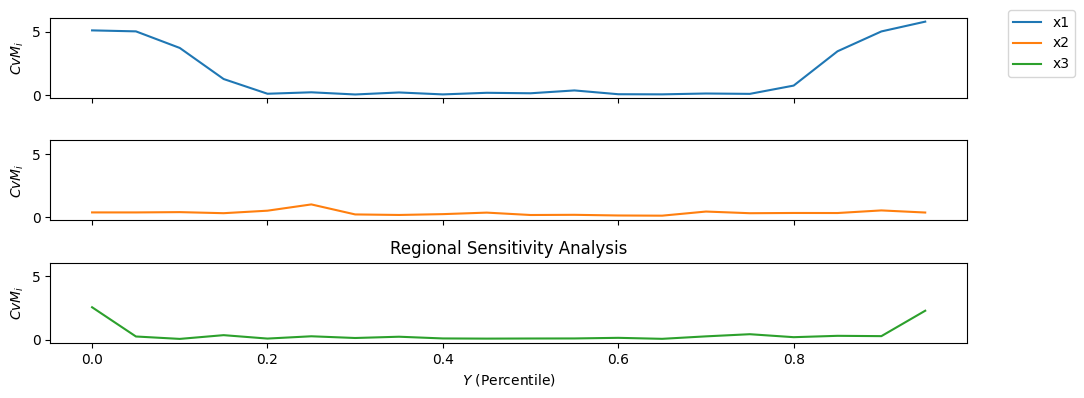

In [23]:
# ==== Regional Sensitivity Analysis ~ Ishigami ===
# explores distribution of model outputs instead of variation 
# characterizes by cumulative distribution function instead of probability distribution function

# define model inputs 
sp = ProblemSpec({
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359]]
})

# TODO ?? any sample
(sp.sample_latin(1000).evaluate(Ishigami.evaluate).analyze_rsa())
print(sp)

df_delta = sp.to_df() # convert to pandas dataframe object

# === Plotting results ===
axes = sp.plot() #  returns matplotlib axes object
fig = plt.gcf() # get current figure
fig.set_size_inches(10, 4)
plt.title(label="Regional Sensitivity Analysis")
plt.tight_layout()

In [77]:
# ==== RSA ~ Sobol G-Function ===
from SALib.test_functions import Sobol_G

def rsa_sobol_g(n:int, sp:ProblemSpec, a_arr=[], delta_arr=[]):
    (sp.sample_latin(1024).evaluate(
        Sobol_G.evaluate, a=np.array(a_arr), delta=np.array(delta_arr)
        ).analyze_rsa())    

    print(sp)

    # === Plotting results ===
    axes = sp.plot() #  returns matplotlib axes object
    fig = plt.gcf() # get current figure
    fig.set_size_inches(100, 4)
    plt.title(label="Regional Sensitivity Analysis")
    plt.tight_layout()

# Discrepancy

Discrepancy: "deviation of the distribution of points in a multi-dimensional space from the uniform distribution"



/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Samples:
	3 parameters: ['x1', 'x2', 'x3']
	1000 samples
Outputs:
	1 outputs: ['Y']
	1000 evaluations
Analysis:
    s_discrepancy
x1       0.334523
x2       0.333072
x3       0.332405



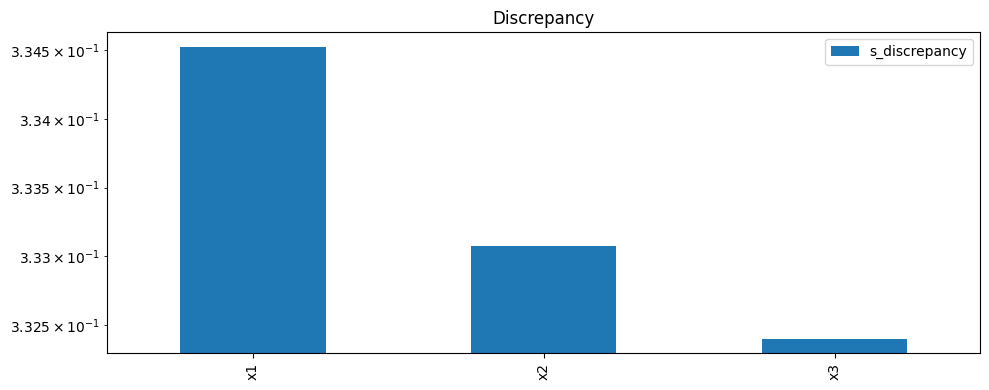

In [39]:
# ==== Discrepancy ~ Ishigami ===
# explores distribution of model outputs instead of variation 
# characterizes by cumulative distribution function instead of probability distribution function

# define model inputs 
sp = ProblemSpec({
    'num_vars': 3,
    'names': ['x1', 'x2', 'x3'],
    'bounds': [[-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359],
               [-3.14159265359, 3.14159265359]]
})

# any sample
(sp.sample_latin(1000).evaluate(Ishigami.evaluate).analyze_discrepancy())
print(sp)

df_delta = sp.to_df() # convert to pandas dataframe object

# === Plotting results ===
axes = sp.plot() #  returns matplotlib axes object
axes.set_yscale('log') # set plot to log scale
fig = plt.gcf() # get current figure
fig.set_size_inches(10, 4)
plt.title(label=f"Discrepancy")
plt.tight_layout()

In [90]:
# ==== Discrepancy ~ Sobol G-Function ===
from SALib.test_functions import Sobol_G

def discrepancy_sobol_g(n:int, sp:ProblemSpec, a_arr=[], delta_arr=[]):
    (sp.sample_latin(1024).evaluate(
        Sobol_G.evaluate, a=np.array(a_arr), delta=np.array(delta_arr)
        ).analyze_discrepancy())    

    print(sp)

    # === Plotting results ===
    axes = sp.plot() #  returns matplotlib axes object
    fig = plt.gcf() # get current figure
    fig.set_size_inches(100, 4)
    plt.title(label="Discrepancy Sensitivity Analysis")
    plt.tight_layout()
    sp.heatmap(title=f"Discrepancy - {n} inputs")

# discrepancy_sobol_g(40)

# Sobol G Function

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	40 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39']
	43008 samples
Outputs:
	1 outputs: ['Y']
	43008 evaluations
Analysis:
           ST   ST_conf
x0   0.027497  0.003077
x1   0.026668  0.002582
x2   0.027094  0.003074
x3   0.026678  0.003338
x4   0.026236  0.003284
x5   0.026688  0.002899
x6   0.026844  0.003253
x7   0.026556  0.002907
x8   0.026170  0.003165
x9   0.025934  0.002903
x10  0.025890  0.002979
x11  0.027592  0.003115
x12  0.028504  0.003047
x13  0.026018  0.003022
x14  0.025414  0.002856
x15  0.026092  0.003189
x16  0.027507  0.003177
x17  0.026312  0.003164
x18  0.027372  0.003341
x19  0.028489  0.003350
x20  0.025865  0.002699
x21  0.026546  0.003145
x22  0.025305  0.002953
x23  0.026354  0.003114
x24  0.027526  0.003288
x25  0.02

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Samples:
	40 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39']
	41984 samples
Outputs:
	1 outputs: ['Y']
	41984 evaluations
Analysis:
           mu   mu_star     sigma  mu_star_conf
x0   0.004868  0.714812  0.774791      0.018004
x1   0.031645  0.720132  0.776814      0.018066
x2   0.002652  0.708843  0.765900      0.017587
x3  -0.022565  0.731954  0.794221      0.019139
x4  -0.013448  0.719316  0.780464      0.019286
x5   0.016864  0.716400  0.777813      0.018836
x6   0.003949  0.728748  0.791899      0.019633
x7  -0.015372  0.711791  0.775797      0.019240
x8   0.007152  0.717825  0.777293      0.019307
x9   0.003678  0.739709  0.808338      0.022457
x10  0.005099  0.723777  0.789367      0.017102
x11  0.005974  0.717883  0.779078      0.017076
x12 -0.05

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Samples:
	40 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
           S1   S1_conf
x0   0.037328  0.037305
x1   0.021578  0.034620
x2   0.043539  0.046958
x3   0.006192  0.030839
x4   0.024221  0.037210
x5   0.032425  0.040030
x6   0.015523  0.039031
x7   0.025936  0.042798
x8   0.019097  0.036530
x9   0.041036  0.041927
x10  0.016908  0.032558
x11  0.037431  0.045312
x12  0.025092  0.036243
x13  0.038135  0.047179
x14  0.025045  0.038190
x15  0.014351  0.035223
x16  0.006698  0.030453
x17  0.020453  0.030016
x18  0.018800  0.037884
x19  0.004400  0.035362
x20  0.041029  0.042170
x21  0.019031  0.041820
x22  0.032973  0.034114
x23  0.029362  0.036076
x24  0.009023  0.035275
x25  0.0063

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Samples:
	40 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
        delta  delta_conf        S1   S1_conf
x0   0.088623    0.017706  0.043069  0.018740
x1   0.092357    0.019727  0.013908  0.015569
x2   0.061348    0.019017  0.021975  0.018745
x3   0.049270    0.016877  0.019586  0.020265
x4   0.148446    0.017217  0.049082  0.022309
x5   0.068647    0.016798  0.019131  0.018389
x6   0.079286    0.015263  0.033483  0.019690
x7   0.091268    0.018745  0.042515  0.024680
x8   0.050626    0.018327  0.014384  0.017330
x9   0.074138    0.021897  0.012796  0.016183
x10  0.028941    0.017696  0.020832  0.020027
x11  0.047288    0.017066  0.010950  0.019153
x12  0.075471    0.018118  0.018089  

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	40 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39']
	41984 samples
Outputs:
	1 outputs: ['Y']
	41984 evaluations
Analysis:
           vi    vi_std      dgsm  dgsm_conf
x0   0.177930  0.141105  0.138857   0.008327
x1   0.178037  0.143607  0.138940   0.008667
x2   0.178002  0.141888  0.138913   0.009535
x3   0.177604  0.138656  0.138602   0.008535
x4   0.177213  0.137590  0.138297   0.008762
x5   0.177843  0.143962  0.138788   0.008768
x6   0.177899  0.139705  0.138832   0.008448
x7   0.177636  0.140610  0.138627   0.008641
x8   0.178394  0.144291  0.139218   0.008474
x9   0.177326  0.138372  0.138385   0.007889
x10  0.178225  0.142330  0.139087   0.008613
x11  0.178045  0.141544  0.138946   0.008761
x12  0.178221  0.142782  0.139083   0.008178
x13

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	40 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
      minimum      mean    median   maximum        CV
x0   0.070701  0.104408  0.099131  0.170975  0.309760
x1   0.044826  0.095180  0.091055  0.145106  0.321584
x2   0.069776  0.111101  0.109279  0.150950  0.195940
x3   0.058907  0.100479  0.097963  0.153378  0.305182
x4   0.062060  0.104752  0.092994  0.191311  0.376239
x5   0.075698  0.104506  0.108437  0.140472  0.187285
x6   0.057138  0.098081  0.098595  0.148542  0.304988
x7   0.049020  0.103691  0.104368  0.172603  0.318015
x8   0.054343  0.105275  0.088460  0.181271  0.438206
x9   0.053232  0.094790  0.088782  0.147346  0.269352
x10  0.074927  0.102189  0.102526  0.1717

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Samples:
	40 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
     s_discrepancy
x0        0.025005
x1        0.025017
x2        0.024998
x3        0.025001
x4        0.024998
x5        0.025003
x6        0.025001
x7        0.025006
x8        0.024999
x9        0.024999
x10       0.025007
x11       0.024999
x12       0.025000
x13       0.025002
x14       0.024999
x15       0.024992
x16       0.025011
x17       0.024999
x18       0.024993
x19       0.024992
x20       0.024997
x21       0.024992
x22       0.025005
x23       0.024992
x24       0.024991
x25       0.025003
x26       0.024992
x27       0.024996
x28       0.025003
x29       0.025001
x30       0.025011
x31       0.025002
x32     

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


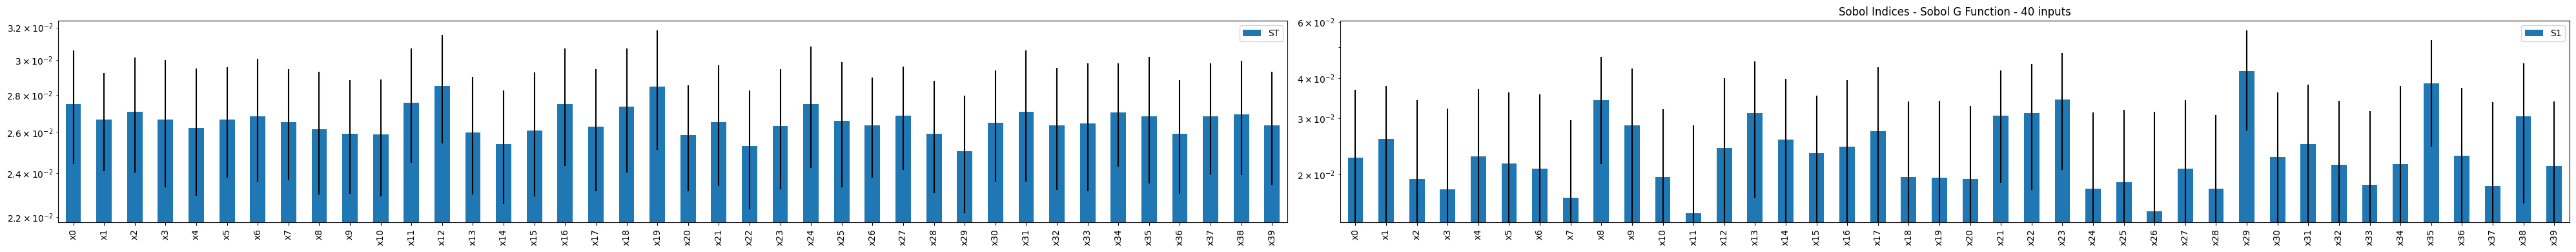

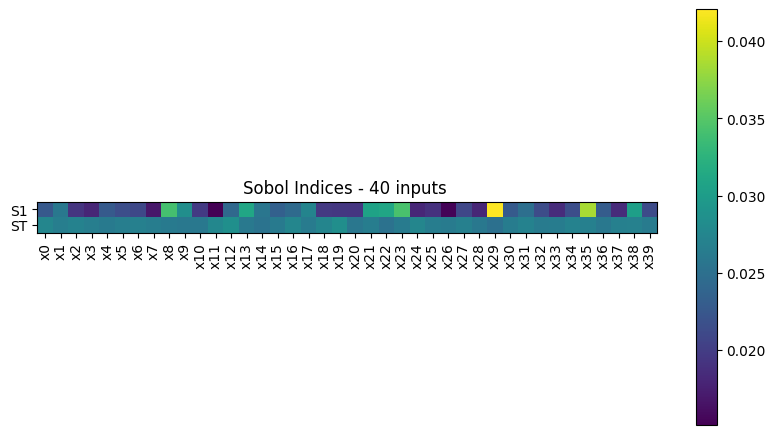

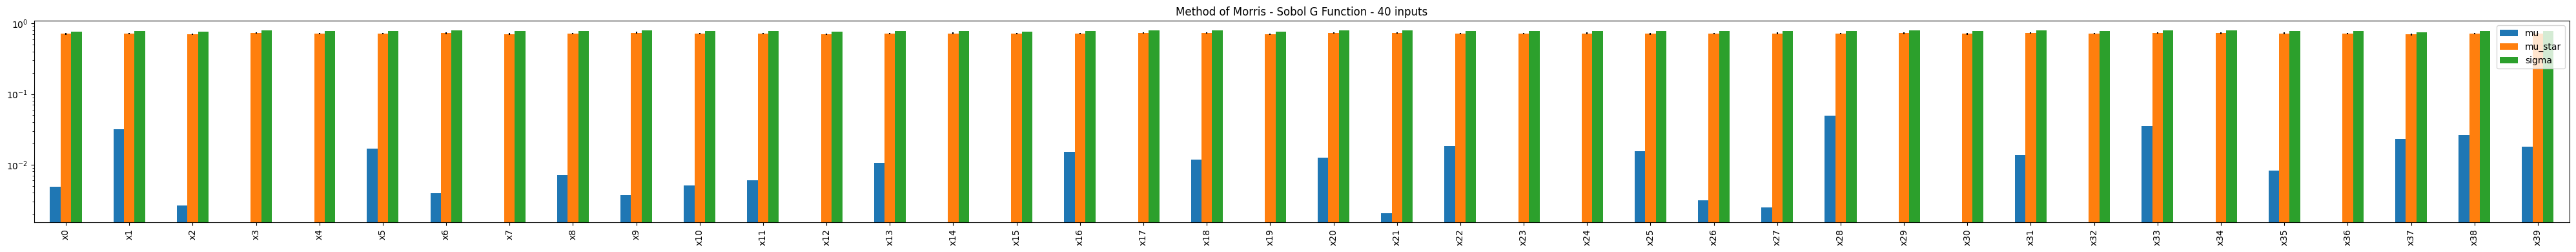

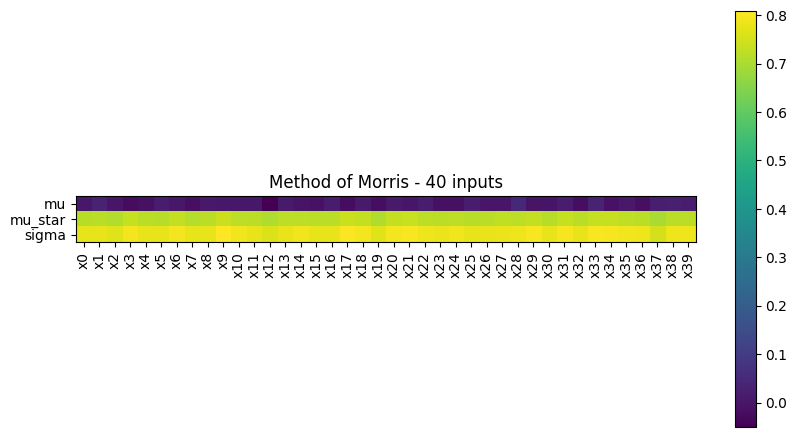

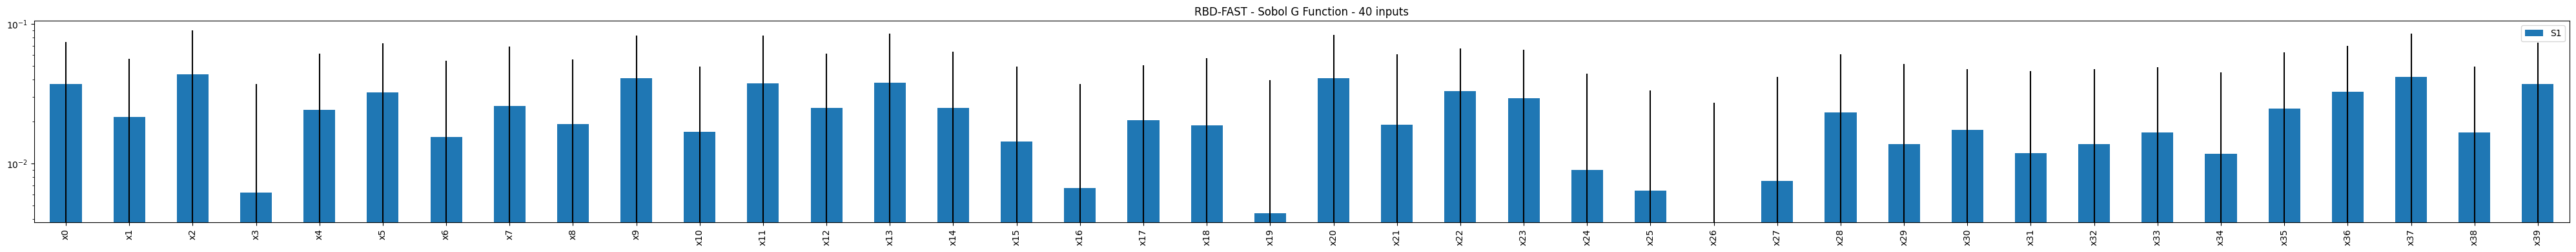

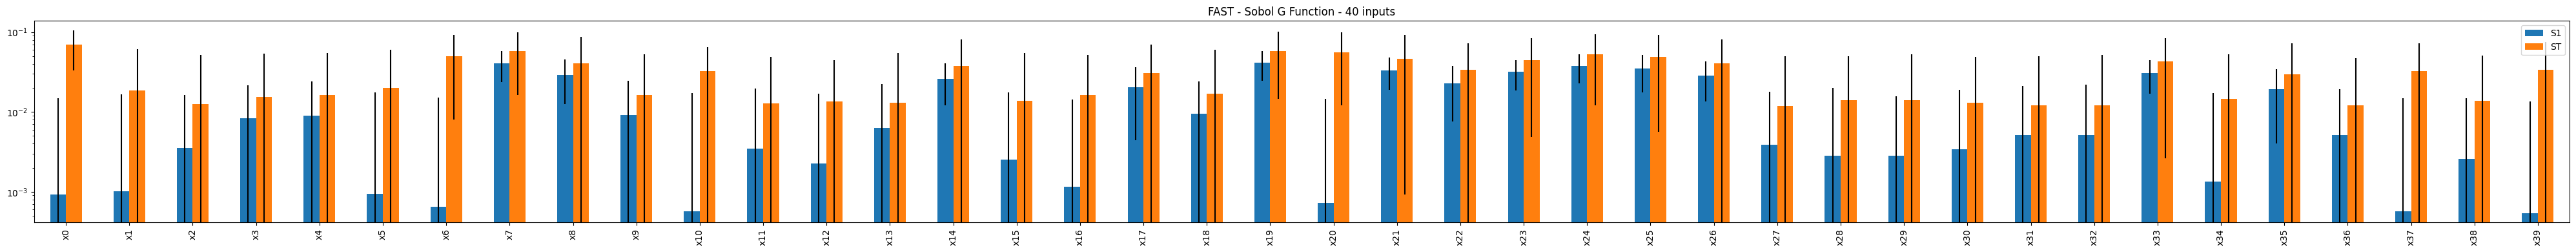

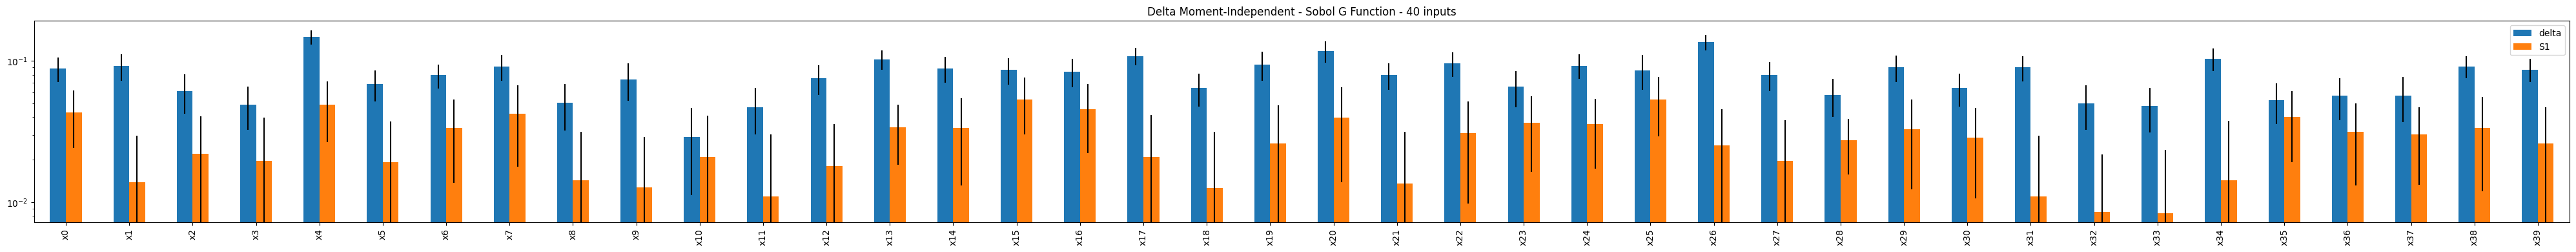

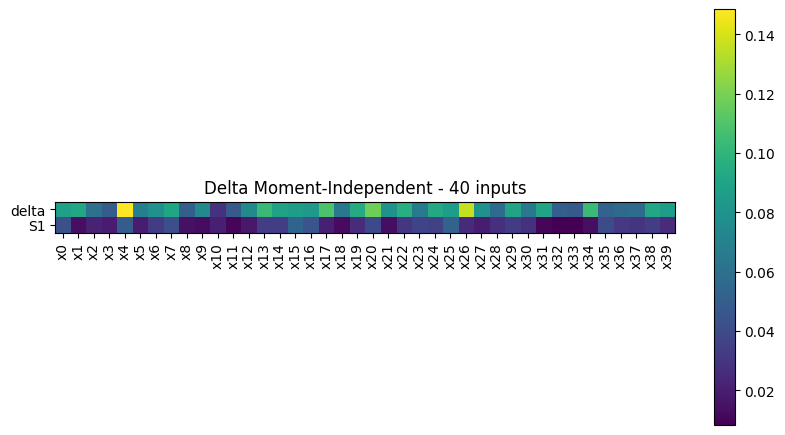

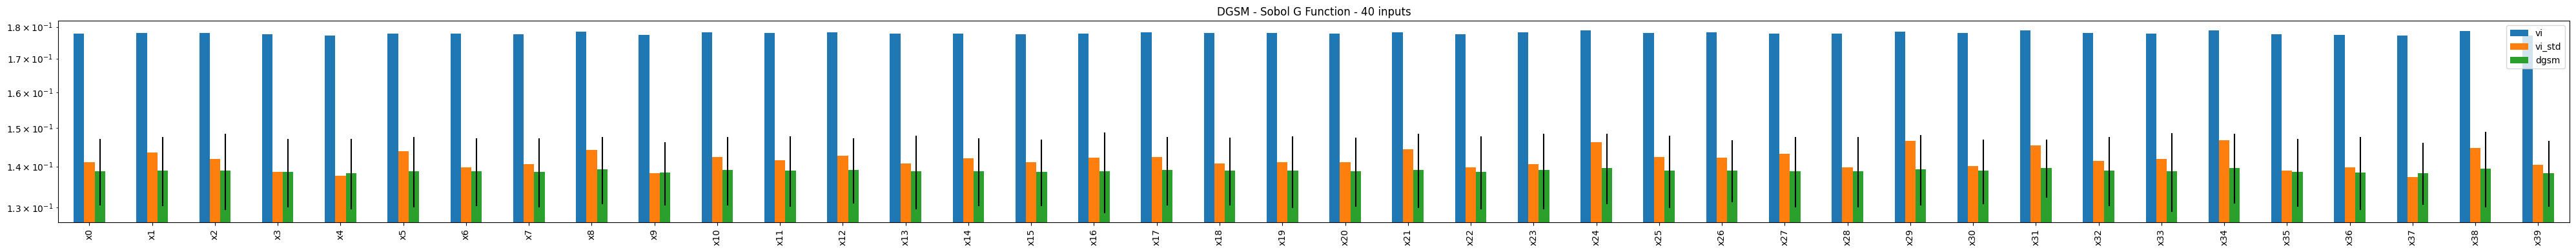

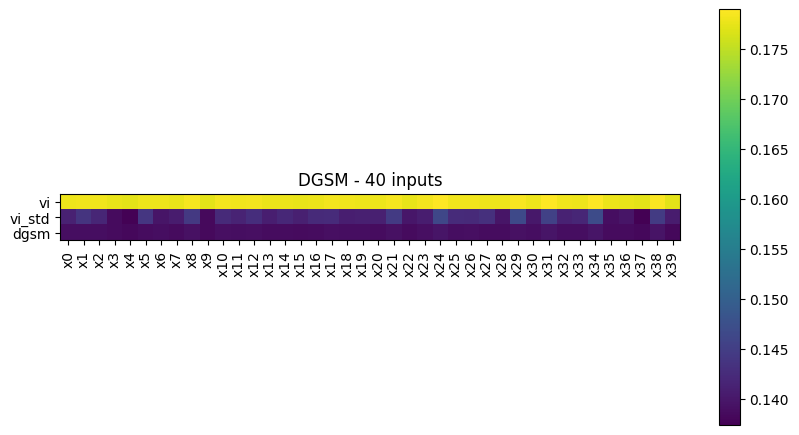

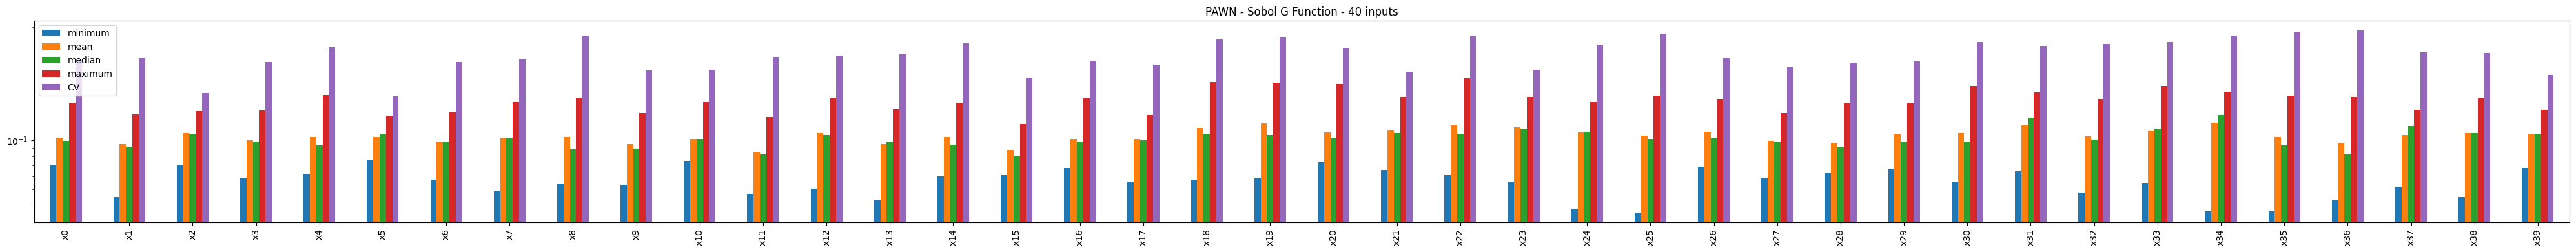

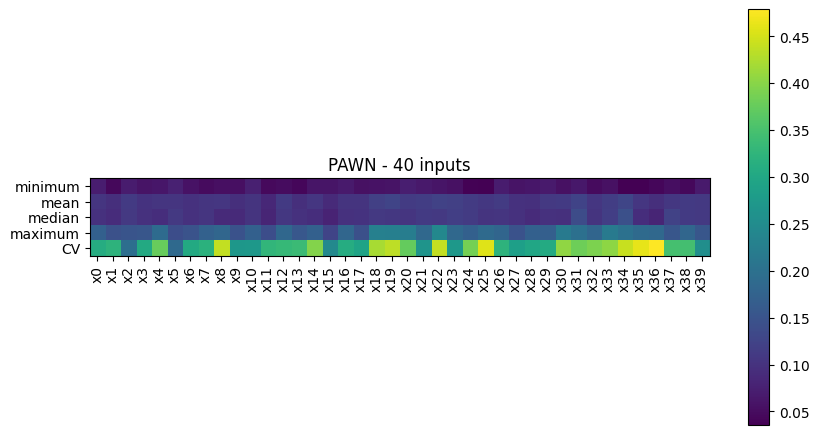

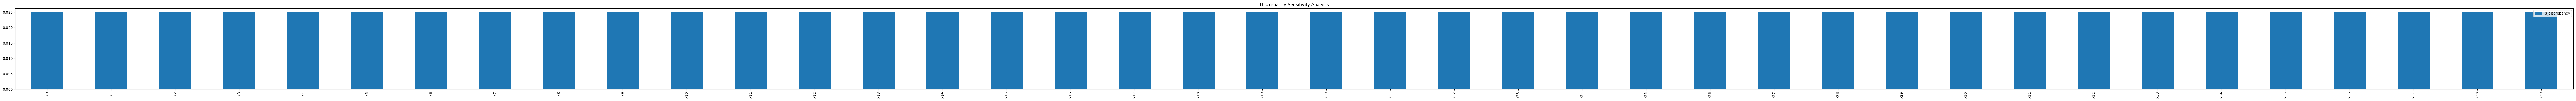

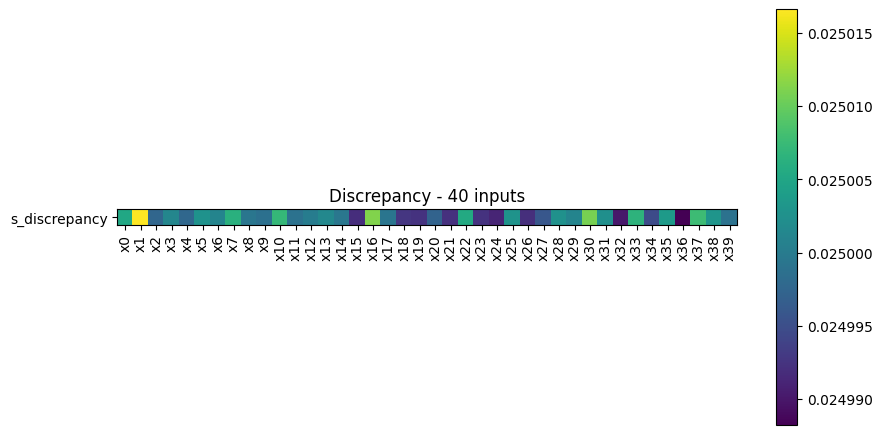

In [91]:
def sobol_g_param(n):
    names_arr = []
    a_ar=[]
    delta_ar=[]
    for i in range(n):
        param = 'x' + str(i)
        names_arr.append(param)

    if len(a_ar) == 0 and len(delta_ar) == 0:
        for i in range(n):
            a_ar.append(9)
            delta_ar.append(1)

    # define model inputs 
    sp = ProblemSpec({
        'num_vars': n,
        'names': names_arr,
        'bounds': [[0,1]] * n 
    })
    return sp, a_ar, delta_ar

sp_param, a_param, delta_param = sobol_g_param(40)

si_sobol_g(40, sp_param, a_arr=a_param, delta_arr=delta_param)
morris_sobol_g(40, sp_param, a_arr=a_param, delta_arr=delta_param)
rbd_fast_sobol_g(40, sp_param, a_arr=a_param, delta_arr=delta_param)
fast_sobol_g(40, sp_param, a_arr=a_param, delta_arr=delta_param)
delta_sobol_g(40, sp_param, a_arr=a_param, delta_arr=delta_param)
dgsm_sobol_g(40, sp_param, a_arr=a_param, delta_arr=delta_param)
pawn_sobol_g(40, sp_param, a_arr=a_param, delta_arr=delta_param)

discrepancy_sobol_g(40, sp_param, a_arr=a_param, delta_arr=delta_param)

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Samples:
	4 parameters: ['x0', 'x1', 'x2', 'x3']
	5120 samples
Outputs:
	1 outputs: ['Y']
	5120 evaluations
Analysis:
          mu   mu_star     sigma  mu_star_conf
x0 -0.007727  0.220769  0.222186      0.001595
x1  0.001855  0.219869  0.221284      0.001339
x2 -0.012482  0.221359  0.222539      0.001571
x3 -0.011375  0.219653  0.220850      0.001516



/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Samples:
	40 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39']
	41984 samples
Outputs:
	1 outputs: ['Y']
	41984 evaluations
Analysis:
           mu   mu_star     sigma  mu_star_conf
x0   0.008784  0.718157  0.777628      0.019970
x1   0.000376  0.720084  0.779197      0.017566
x2  -0.009237  0.703892  0.759419      0.017203
x3  -0.013932  0.715326  0.774748      0.018393
x4  -0.008244  0.729174  0.787749      0.016913
x5   0.020318  0.716789  0.773527      0.018614
x6   0.014646  0.720628  0.778875      0.016424
x7  -0.019443  0.708299  0.763558      0.016249
x8   0.015922  0.711637  0.765190      0.014757
x9  -0.067091  0.721551  0.783729      0.019777
x10  0.028756  0.716869  0.772788      0.015985
x11 -0.035443  0.707513  0.765457      0.016235
x12  0.02

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Samples:
	400 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91', 'x92', 'x93', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99', 'x100', 'x101', 'x102', 'x103', 'x104', 'x105', 'x106', 'x107', 'x108', 'x109', 'x110', 'x111', 'x112', 'x113', 'x114', 'x115', 'x116', 'x117', 'x118', 'x119', 'x120', 'x121', 'x122', 'x123', 'x124', 'x125', 'x126', 'x127', 'x128', 'x129', 'x130', 'x131', 'x132', 'x133', 'x134', 'x1

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


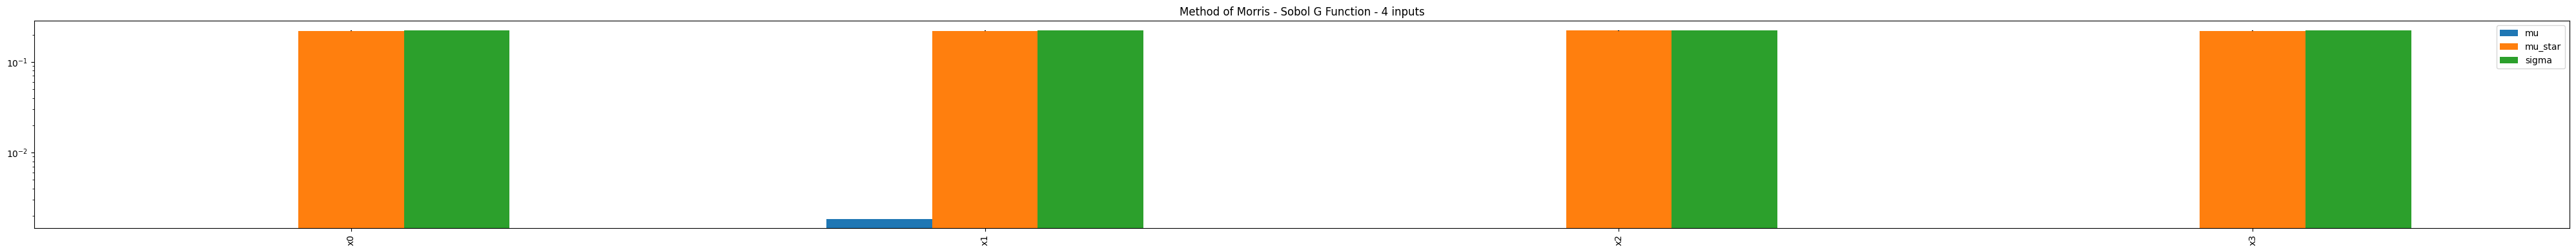

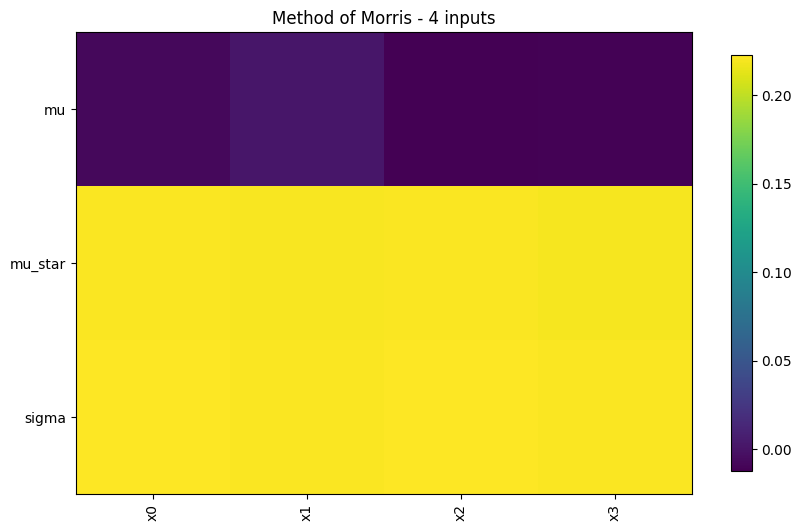

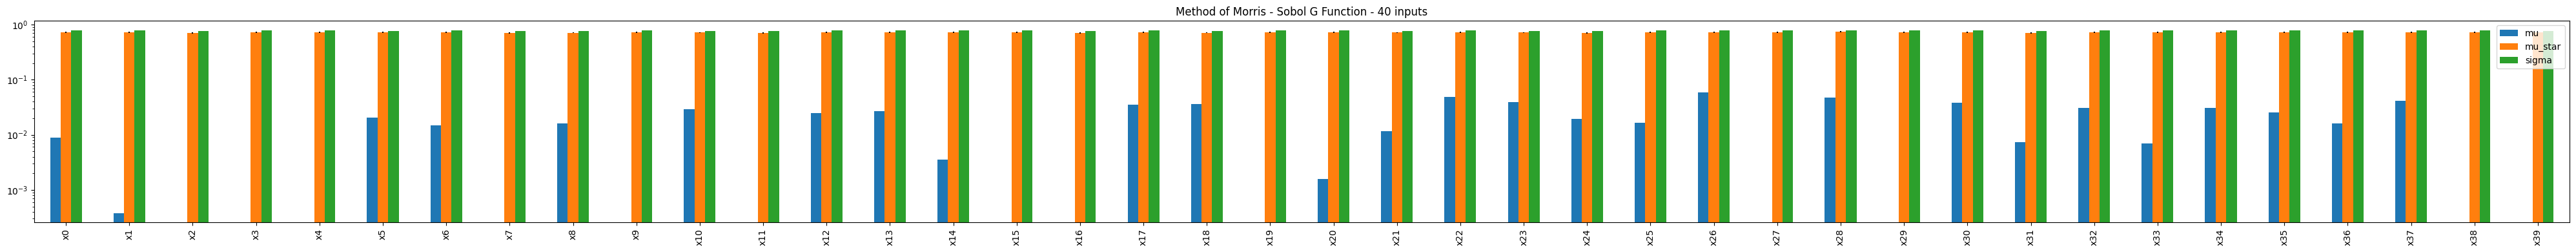

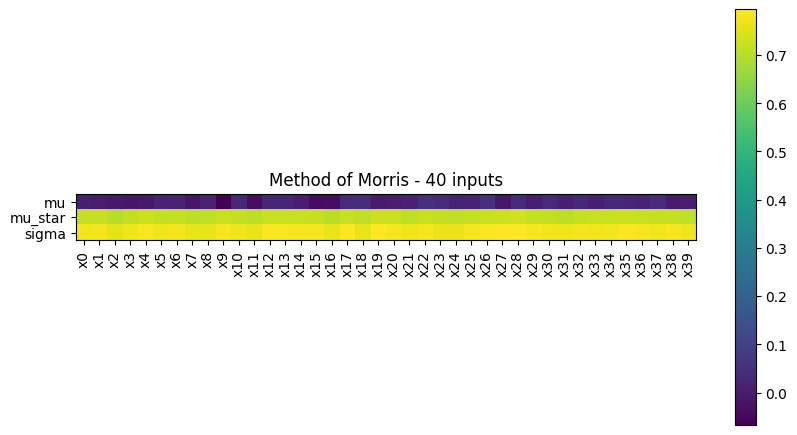

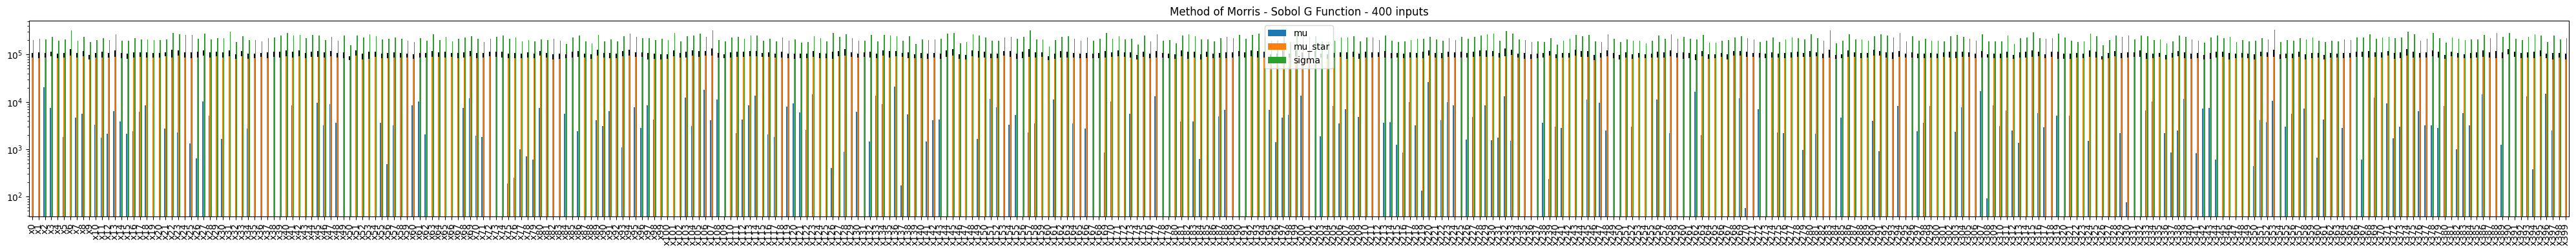

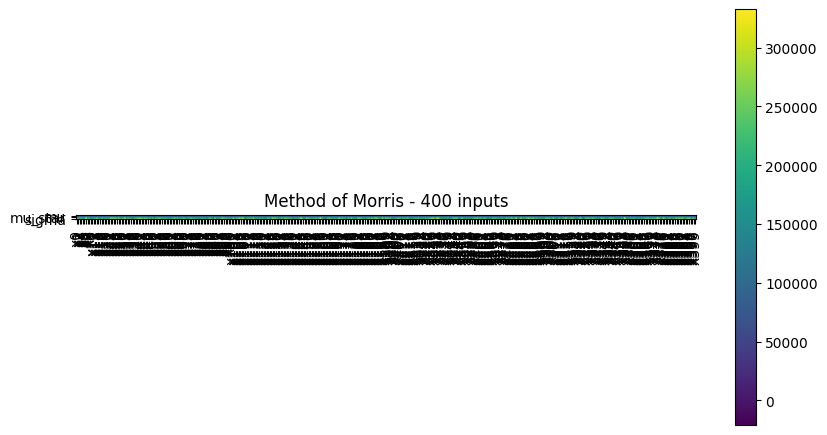

In [12]:

def sobol_g_param(n):
    names_arr = []
    a_ar=[]
    delta_ar=[]
    for i in range(n):
        param = 'x' + str(i)
        names_arr.append(param)

    if len(a_ar) == 0 and len(delta_ar) == 0:
        for i in range(n):
            a_ar.append(9)
            delta_ar.append(1)

    # define model inputs 
    sp = ProblemSpec({
        'num_vars': n,
        'names': names_arr,
        'bounds': [[0,1]] * n 
    })
    return sp, a_ar, delta_ar

sp_param_4, a_param_4, delta_param_4 = sobol_g_param(4)
sp_param_40, a_param_40, delta_param_40 = sobol_g_param(40)
sp_param_400, a_param_400, delta_param_400 = sobol_g_param(400)

morris_sobol_g(4, sp_param_4, a_arr=a_param_4, delta_arr=delta_param_4)
morris_sobol_g(40, sp_param_40, a_arr=a_param_40, delta_arr=delta_param_40)
morris_sobol_g(400, sp_param_400, a_arr=a_param_400, delta_arr=delta_param_400)



In [ ]:
fast_sobol_g(40, sp_param, a_arr=a_param, delta_arr=delta_param)
delta_sobol_g(40, sp_param, a_arr=a_param, delta_arr=delta_param)
dgsm_sobol_g(40, sp_param, a_arr=a_param, delta_arr=delta_param)
pawn_sobol_g(40, sp_param, a_arr=a_param, delta_arr=delta_param)
discrepancy_sobol_g(40, sp_param, a_arr=a_param, delta_arr=delta_param)

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	4 parameters: ['x0', 'x1', 'x2', 'x3']
	6144 samples
Outputs:
	1 outputs: ['Y']
	6144 evaluations
Analysis:
          ST   ST_conf
x0  0.250543  0.023328
x1  0.250315  0.020708
x2  0.249822  0.020878
x3  0.250504  0.023100
          S1   S1_conf
x0  0.251331  0.044069
x1  0.250550  0.035905
x2  0.247443  0.039941
x3  0.247989  0.040585



/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	40 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39']
	43008 samples
Outputs:
	1 outputs: ['Y']
	43008 evaluations
Analysis:
           ST   ST_conf
x0   0.027076  0.003298
x1   0.027770  0.003062
x2   0.027664  0.003233
x3   0.026929  0.002851
x4   0.027748  0.003375
x5   0.027014  0.003216
x6   0.026242  0.003015
x7   0.026639  0.003143
x8   0.027380  0.002913
x9   0.027505  0.002981
x10  0.027618  0.003189
x11  0.027511  0.003244
x12  0.027772  0.003325
x13  0.026030  0.003835
x14  0.026600  0.003382
x15  0.027342  0.003261
x16  0.026695  0.002951
x17  0.027704  0.003339
x18  0.026016  0.002987
x19  0.026134  0.003221
x20  0.027700  0.003265
x21  0.026253  0.003242
x22  0.026954  0.003358
x23  0.027372  0.003054
x24  0.026982  0.003443
x25  0.02

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	400 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91', 'x92', 'x93', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99', 'x100', 'x101', 'x102', 'x103', 'x104', 'x105', 'x106', 'x107', 'x108', 'x109', 'x110', 'x111', 'x112', 'x113', 'x114', 'x115', 'x116', 'x117', 'x118', 'x119', 'x120', 'x121', 'x122', 'x123', 'x124', 'x125', 'x126', 'x127', 'x128', 'x129', 'x130', 'x131', 'x132', 'x133', 'x134', 'x1

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


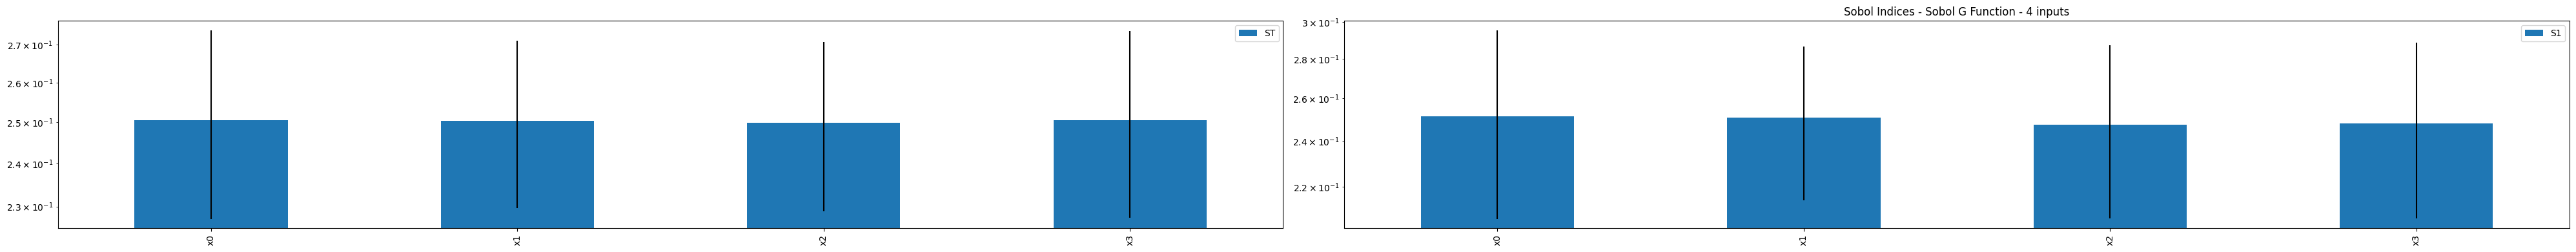

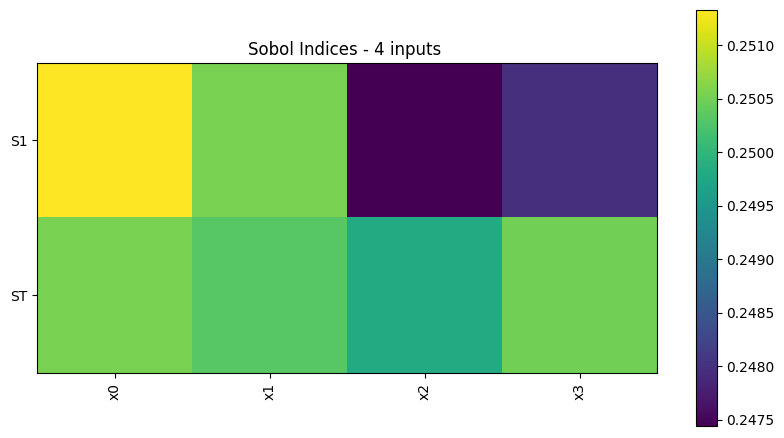

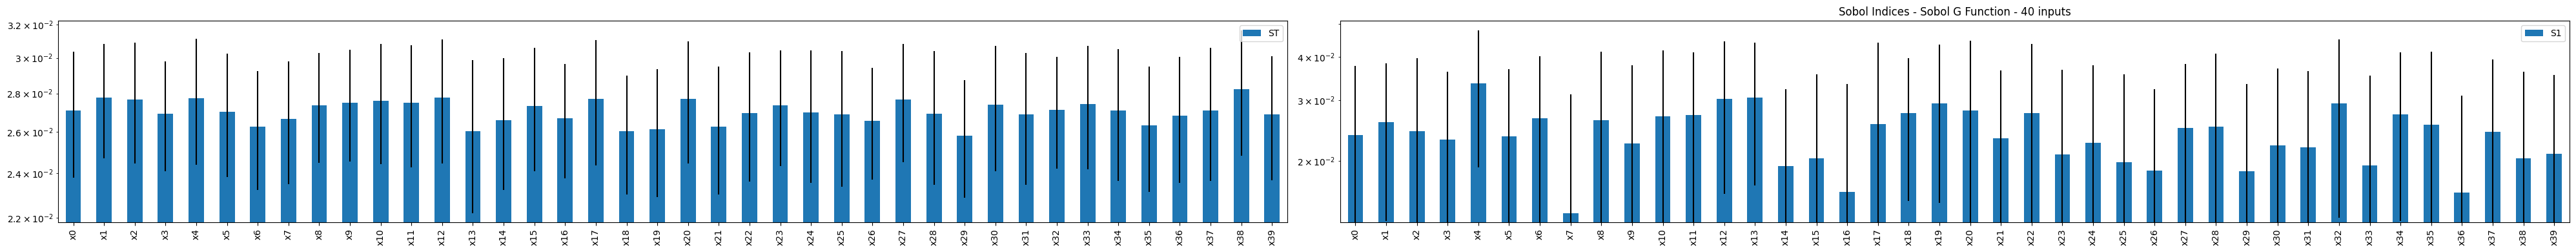

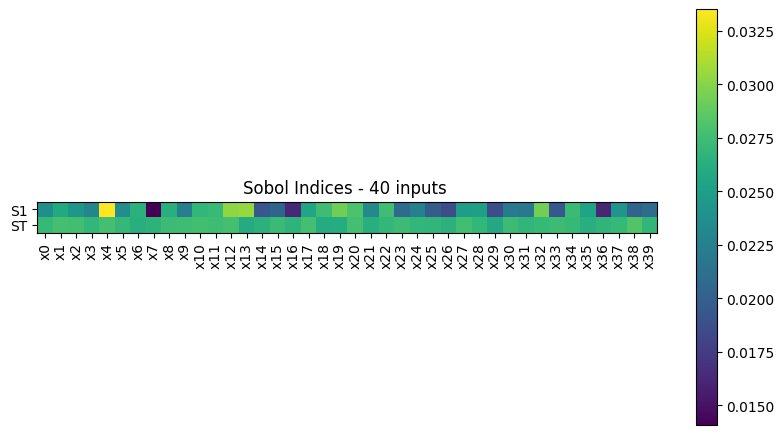

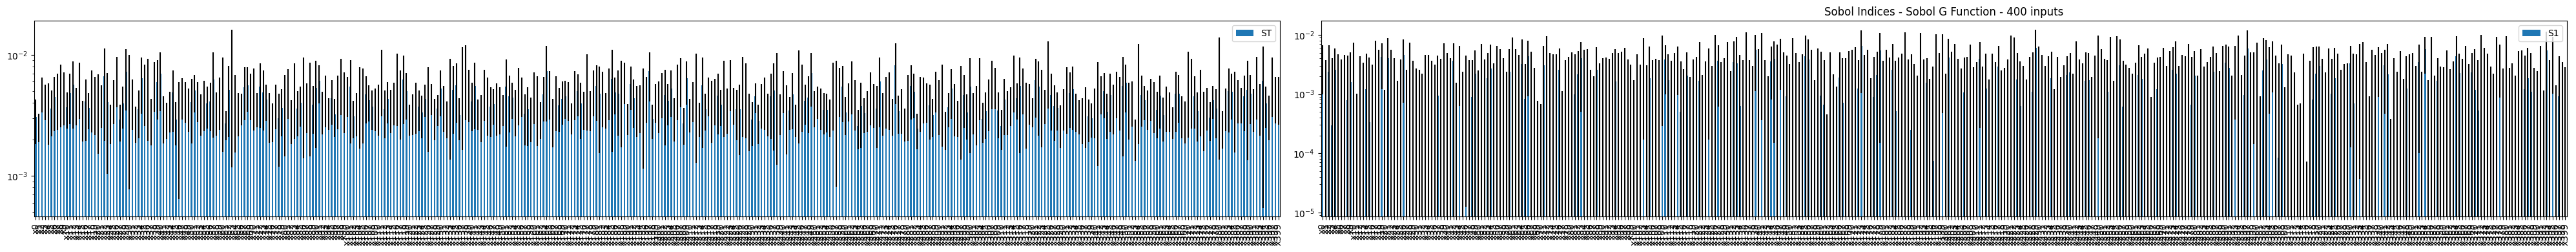

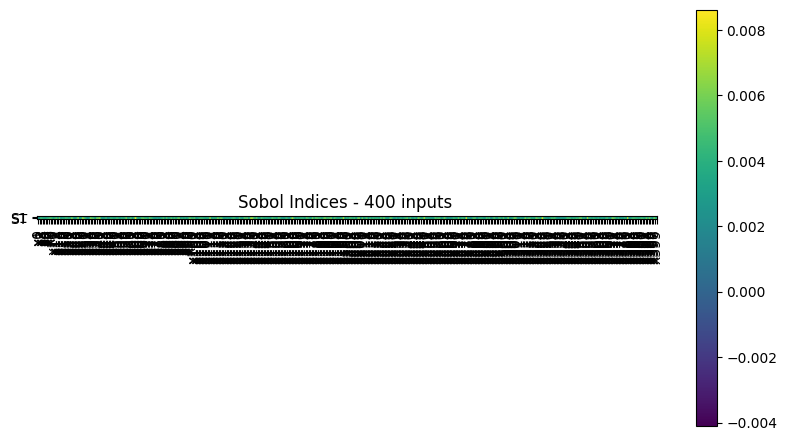

In [111]:
si_sobol_g(4, sp_param_4, a_arr=a_param_4, delta_arr=delta_param_4)
si_sobol_g(40, sp_param_40, a_arr=a_param_40, delta_arr=delta_param_40)
si_sobol_g(400, sp_param_400, a_arr=a_param_400, delta_arr=delta_param_400)

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Samples:
	4 parameters: ['x0', 'x1', 'x2', 'x3']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
          S1   S1_conf
x0  0.246392  0.062317
x1  0.210718  0.057392
x2  0.249738  0.059341
x3  0.260204  0.065062

Samples:
	40 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
           S1   S1_conf
x0   0.007754  0.031218
x1   0.016268  0.034375
x2   0.029695  0.045679
x3   0.007041  0.032142
x4   0.013270  0.033735
x5   0.037021  0.044522
x6   0.018507  0.038891
x7   0.034168  0.040686
x8   0.013988  0.032331
x9   0.011911  0.026605
x10  0.031740  0.042036
x11  0.023040  0.050630
x12  0.017744  0.031574
x13  0.034326  0.040319
x14  0.042478  0.046317
x15  0.013605  0.

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Samples:
	400 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91', 'x92', 'x93', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99', 'x100', 'x101', 'x102', 'x103', 'x104', 'x105', 'x106', 'x107', 'x108', 'x109', 'x110', 'x111', 'x112', 'x113', 'x114', 'x115', 'x116', 'x117', 'x118', 'x119', 'x120', 'x121', 'x122', 'x123', 'x124', 'x125', 'x126', 'x127', 'x128', 'x129', 'x130', 'x131', 'x132', 'x133', 'x134', 'x1

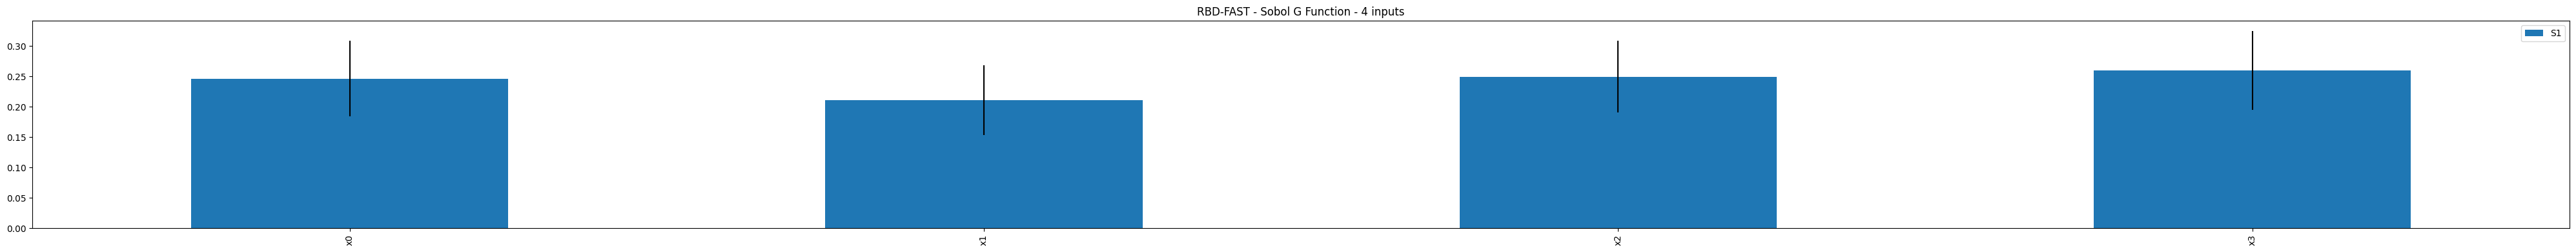

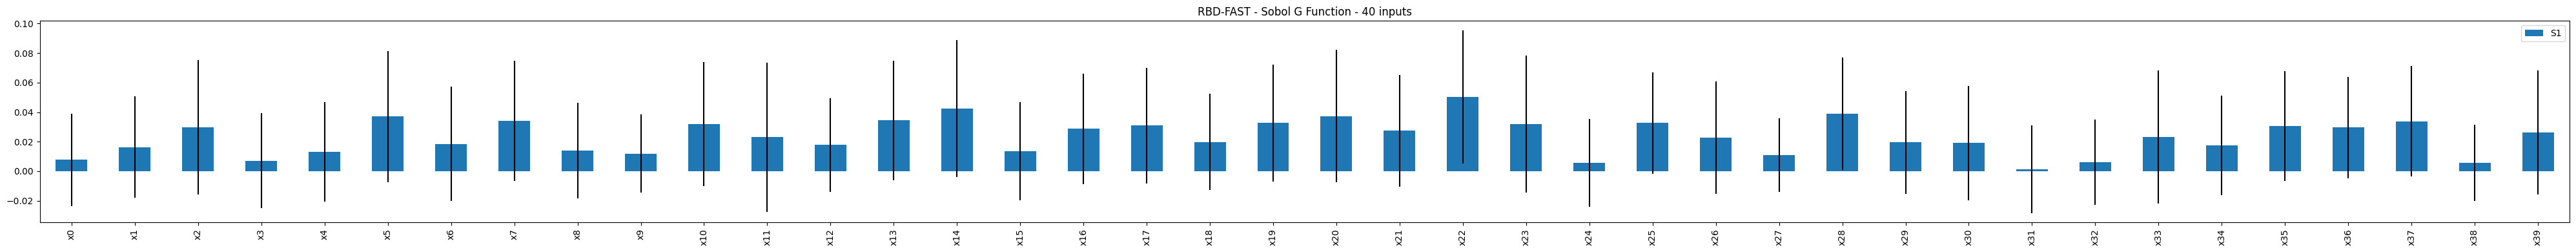

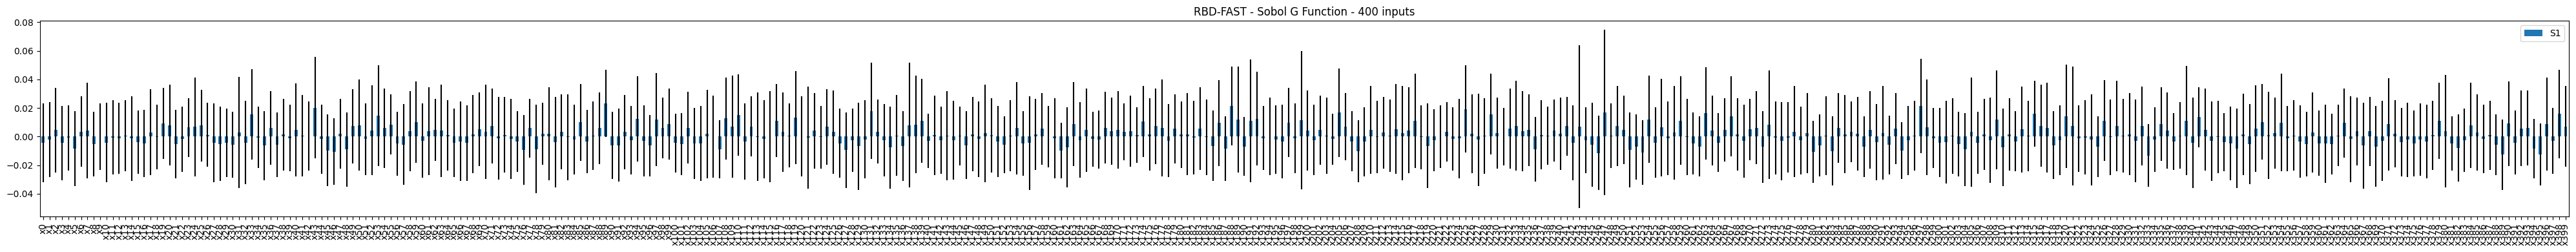

In [13]:
rbd_fast_sobol_g(4, sp_param_4, a_arr=a_param_4, delta_arr=delta_param_4)
rbd_fast_sobol_g(40, sp_param_40, a_arr=a_param_40, delta_arr=delta_param_40)
rbd_fast_sobol_g(400, sp_param_400, a_arr=a_param_400, delta_arr=delta_param_400)

Samples:
	4 parameters: ['x0', 'x1', 'x2', 'x3']
	4096 samples
Outputs:
	1 outputs: ['Y']
	4096 evaluations
Analysis:
          S1        ST   S1_conf   ST_conf
x0  0.245381  0.255753  0.017164  0.039536
x1  0.243293  0.253026  0.014003  0.037033
x2  0.243713  0.255042  0.016643  0.037491
x3  0.245410  0.256074  0.014796  0.041602

Samples:
	40 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39']
	40960 samples
Outputs:
	1 outputs: ['Y']
	40960 evaluations
Analysis:
           S1        ST   S1_conf   ST_conf
x0   0.020895  0.031399  0.016793  0.039285
x1   0.005491  0.012446  0.012974  0.041828
x2   0.000546  0.040627  0.014223  0.041664
x3   0.021564  0.032222  0.014198  0.039925
x4   0.001628  0.013425  0.012631  0.041478
x5   0.000882  0.021897  0.014226  

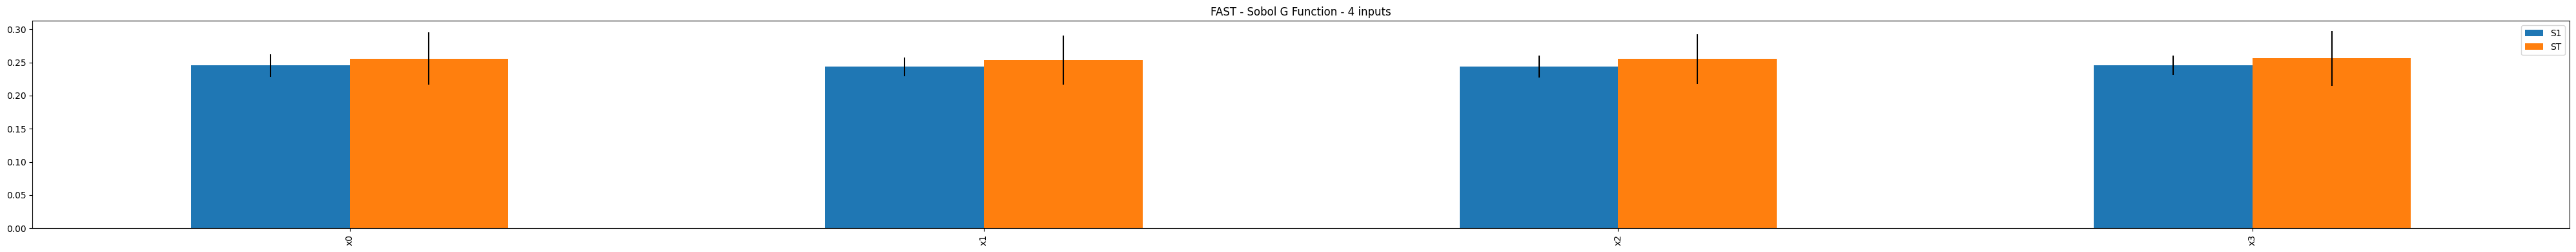

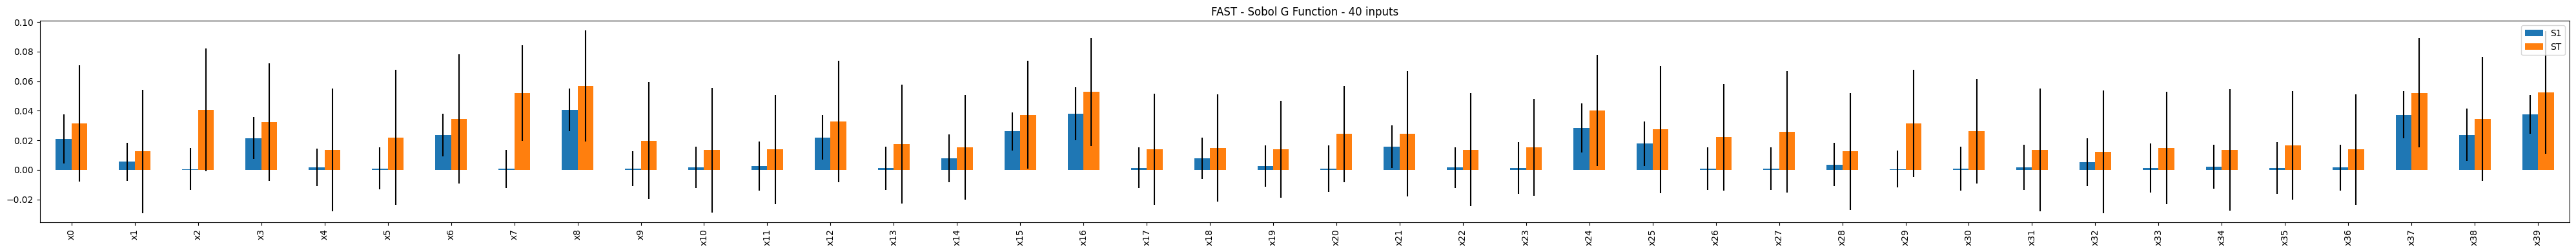

In [15]:
fast_sobol_g(4, sp_param_4, a_arr=a_param_4, delta_arr=delta_param_4)
fast_sobol_g(40, sp_param_40, a_arr=a_param_40, delta_arr=delta_param_40)
# fast_sobol_g(400, sp_param_400, a_arr=a_param_400, delta_arr=delta_param_400)

Samples:
	4 parameters: ['x0', 'x1', 'x2', 'x3']
	5120 samples
Outputs:
	1 outputs: ['Y']
	5120 evaluations
Analysis:
          vi    vi_std      dgsm  dgsm_conf
x0  0.161096  0.033447  1.218589   0.001990
x1  0.161104  0.033451  1.218652   0.002076
x2  0.161077  0.033486  1.218444   0.002342
x3  0.161072  0.033458  1.218412   0.002312



/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	40 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39']
	41984 samples
Outputs:
	1 outputs: ['Y']
	41984 evaluations
Analysis:
           vi    vi_std      dgsm  dgsm_conf
x0   0.177930  0.141105  0.138857   0.008177
x1   0.178037  0.143607  0.138940   0.008957
x2   0.178002  0.141888  0.138913   0.007215
x3   0.177604  0.138656  0.138602   0.009172
x4   0.177213  0.137590  0.138297   0.009020
x5   0.177843  0.143962  0.138788   0.008872
x6   0.177899  0.139705  0.138832   0.008577
x7   0.177636  0.140610  0.138627   0.008347
x8   0.178394  0.144291  0.139218   0.009133
x9   0.177326  0.138372  0.138385   0.009203
x10  0.178225  0.142330  0.139087   0.007885
x11  0.178045  0.141544  0.138946   0.009195
x12  0.178221  0.142782  0.139083   0.007889
x13

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	400 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91', 'x92', 'x93', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99', 'x100', 'x101', 'x102', 'x103', 'x104', 'x105', 'x106', 'x107', 'x108', 'x109', 'x110', 'x111', 'x112', 'x113', 'x114', 'x115', 'x116', 'x117', 'x118', 'x119', 'x120', 'x121', 'x122', 'x123', 'x124', 'x125', 'x126', 'x127', 'x128', 'x129', 'x130', 'x131', 'x132', 'x133', 'x134', 'x1

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


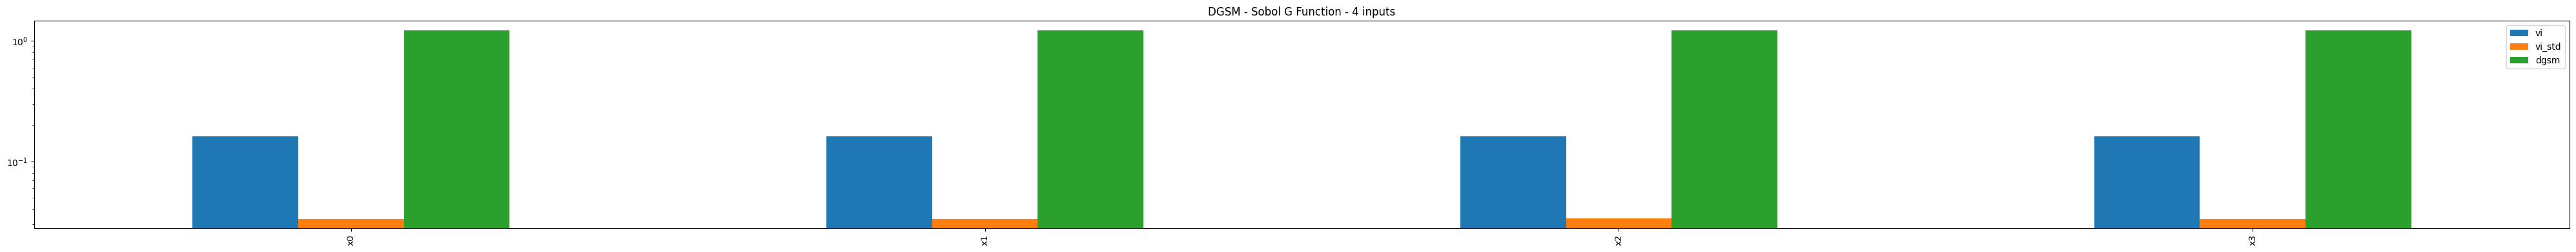

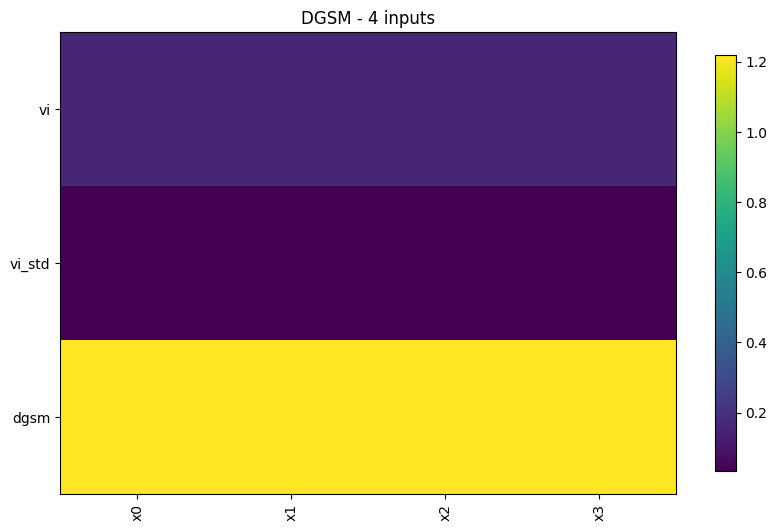

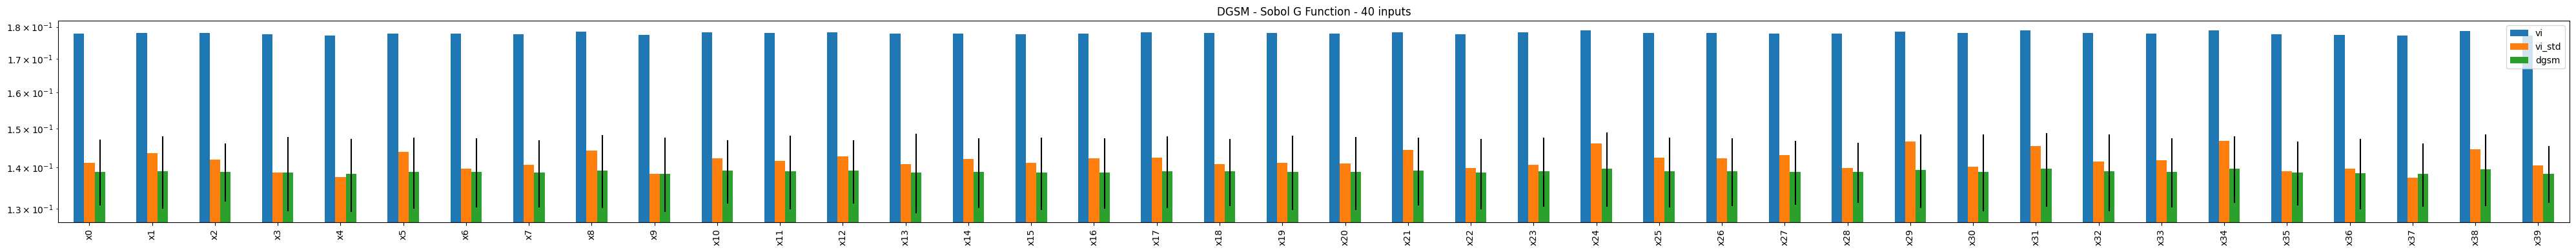

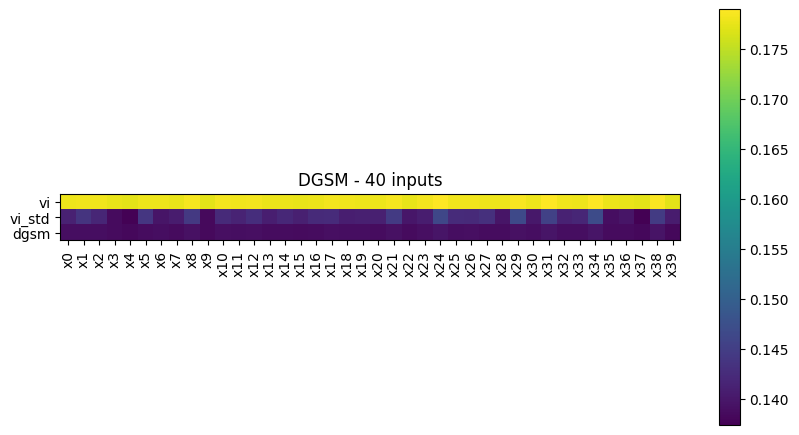

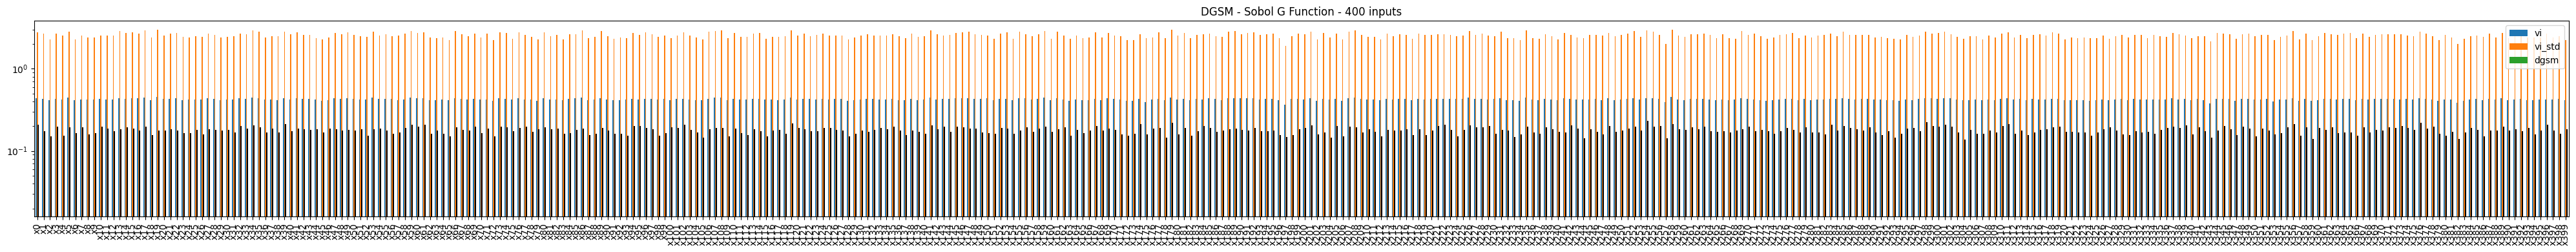

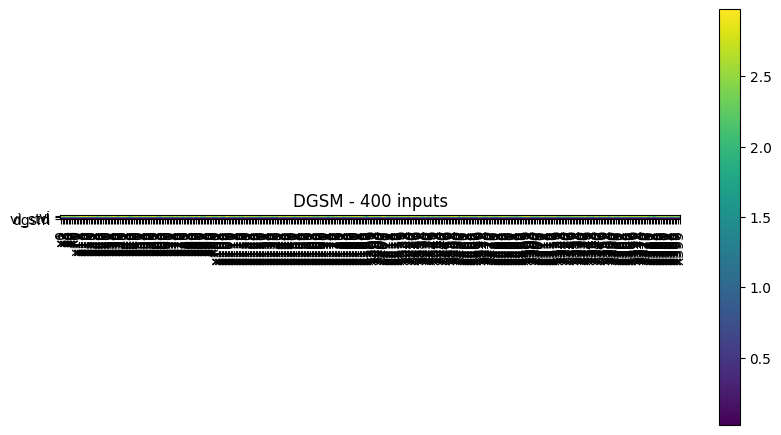

In [114]:
dgsm_sobol_g(4, sp_param_4, a_arr=a_param_4, delta_arr=delta_param_4)
dgsm_sobol_g(40, sp_param_40, a_arr=a_param_40, delta_arr=delta_param_40)
dgsm_sobol_g(400, sp_param_400, a_arr=a_param_400, delta_arr=delta_param_400)

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is 

Samples:
	4 parameters: ['x0', 'x1', 'x2', 'x3']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
     minimum      mean    median   maximum        CV
x0  0.063094  0.212854  0.223422  0.313725  0.389975
x1  0.072936  0.196581  0.174652  0.323972  0.444574
x2  0.065353  0.225430  0.213240  0.360409  0.413642
x3  0.055607  0.206640  0.210147  0.313059  0.412278



/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	40 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
      minimum      mean    median   maximum        CV
x0   0.042777  0.093705  0.085631  0.168543  0.356434
x1   0.065581  0.115170  0.104100  0.209942  0.373577
x2   0.042605  0.103456  0.104094  0.159735  0.292014
x3   0.035403  0.099575  0.089480  0.186685  0.475560
x4   0.054879  0.116702  0.105899  0.206821  0.433800
x5   0.060643  0.101603  0.095565  0.157801  0.321628
x6   0.076746  0.107821  0.102660  0.140165  0.216715
x7   0.064472  0.103720  0.090114  0.170984  0.360390
x8   0.051834  0.108867  0.107611  0.169022  0.342520
x9   0.070198  0.109466  0.091090  0.180057  0.376436
x10  0.056404  0.104821  0.105959  0.1700

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Samples:
	400 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91', 'x92', 'x93', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99', 'x100', 'x101', 'x102', 'x103', 'x104', 'x105', 'x106', 'x107', 'x108', 'x109', 'x110', 'x111', 'x112', 'x113', 'x114', 'x115', 'x116', 'x117', 'x118', 'x119', 'x120', 'x121', 'x122', 'x123', 'x124', 'x125', 'x126', 'x127', 'x128', 'x129', 'x130', 'x131', 'x132', 'x133', 'x134', 'x1

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


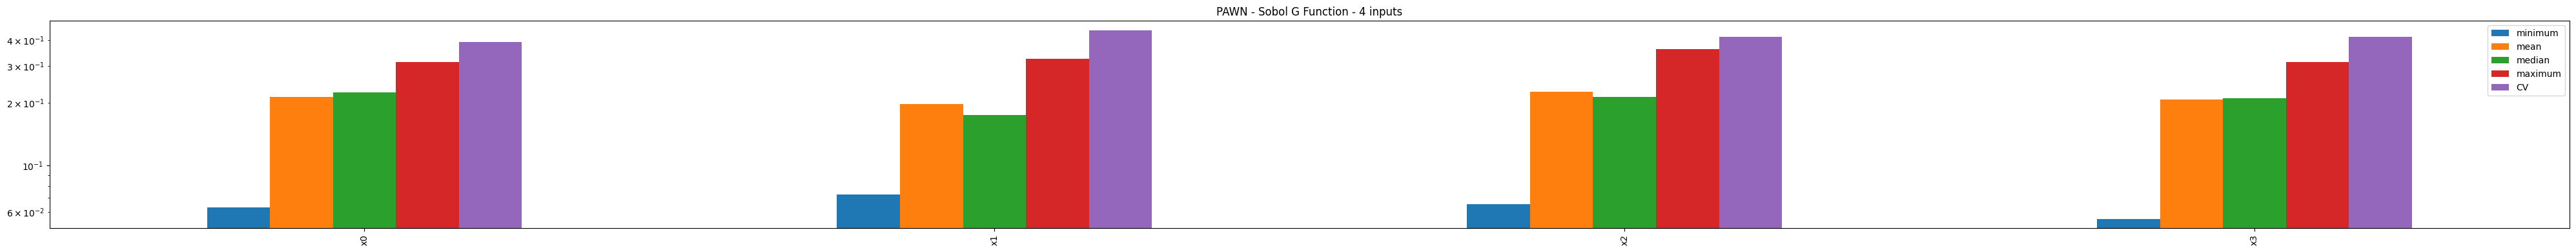

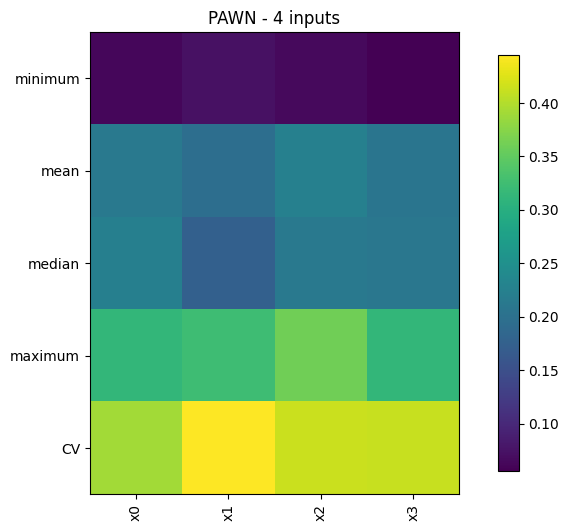

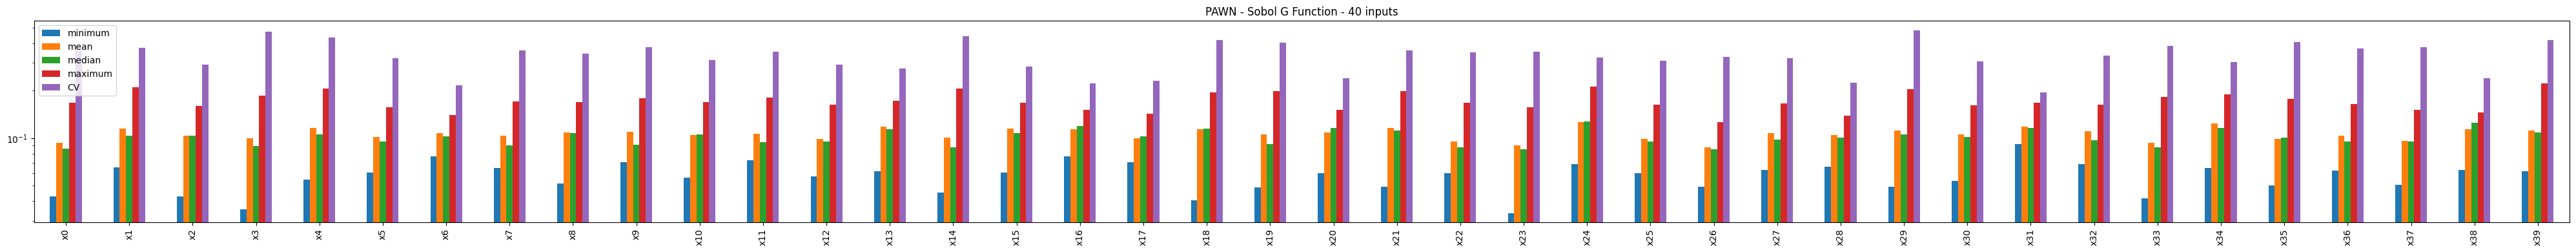

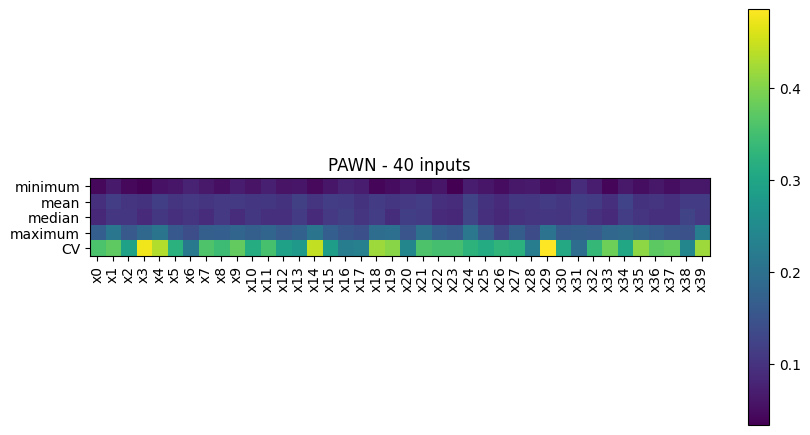

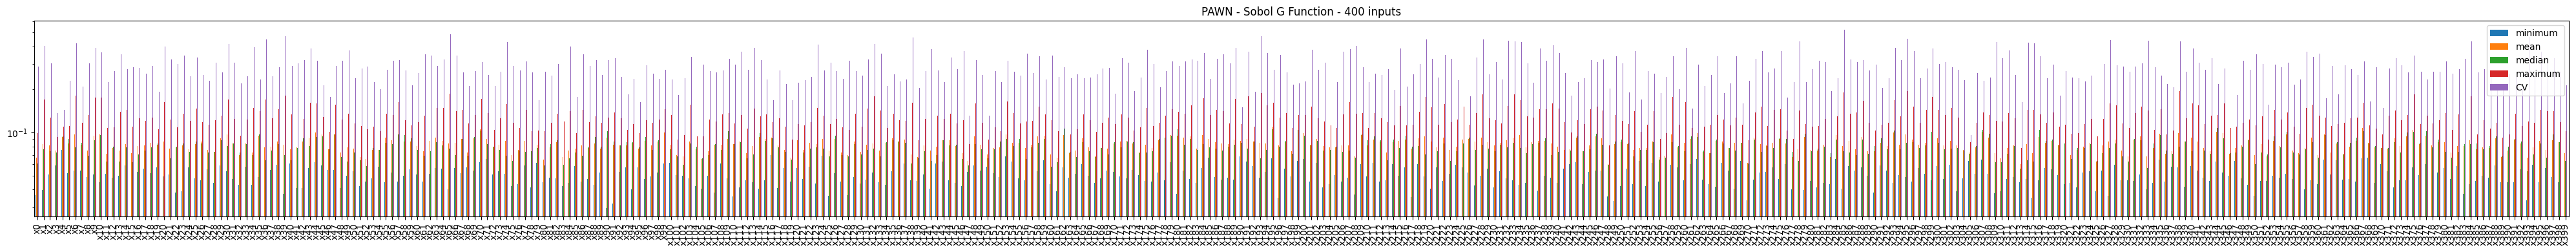

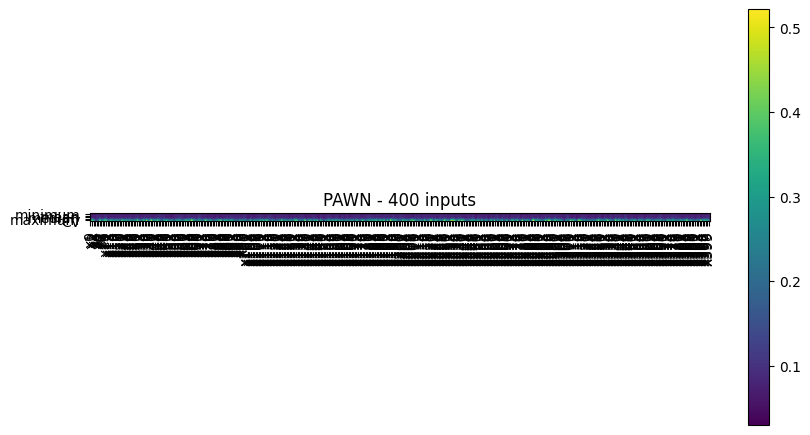

In [115]:
pawn_sobol_g(4, sp_param_4, a_arr=a_param_4, delta_arr=delta_param_4)
pawn_sobol_g(40, sp_param_40, a_arr=a_param_40, delta_arr=delta_param_40)
pawn_sobol_g(400, sp_param_400, a_arr=a_param_400, delta_arr=delta_param_400)

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Samples:
	4 parameters: ['x0', 'x1', 'x2', 'x3']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
    s_discrepancy
x0       0.249540
x1       0.250739
x2       0.249500
x3       0.250221

Samples:
	40 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39']
	1024 samples
Outputs:
	1 outputs: ['Y']
	1024 evaluations
Analysis:
     s_discrepancy
x0        0.024989
x1        0.025002
x2        0.025009
x3        0.025003
x4        0.024997
x5        0.024991
x6        0.025004
x7        0.024989
x8        0.024996
x9        0.024993
x10       0.024995
x11       0.025002
x12       0.025000
x13       0.024999
x14       0.025002
x15       0.025001
x16       0.025009
x17       0.024993
x18       0.024998
x19       0.024999
x20       0.025014
x21     

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:302: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_group_names = pd.unique(groups)


Samples:
	400 parameters: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91', 'x92', 'x93', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99', 'x100', 'x101', 'x102', 'x103', 'x104', 'x105', 'x106', 'x107', 'x108', 'x109', 'x110', 'x111', 'x112', 'x113', 'x114', 'x115', 'x116', 'x117', 'x118', 'x119', 'x120', 'x121', 'x122', 'x123', 'x124', 'x125', 'x126', 'x127', 'x128', 'x129', 'x130', 'x131', 'x132', 'x133', 'x134', 'x1

/home/yuana/personal_projects/summer24/env/lib/python3.10/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


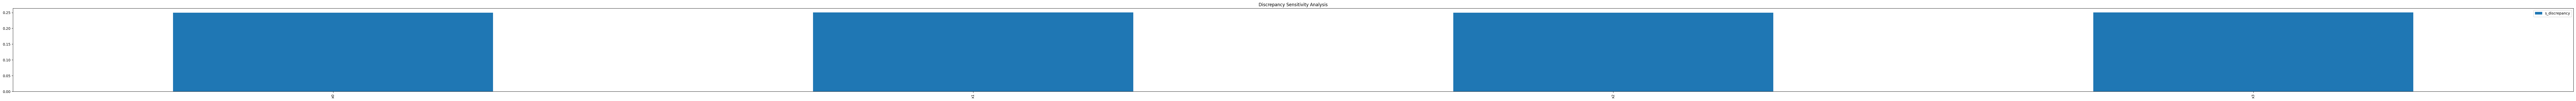

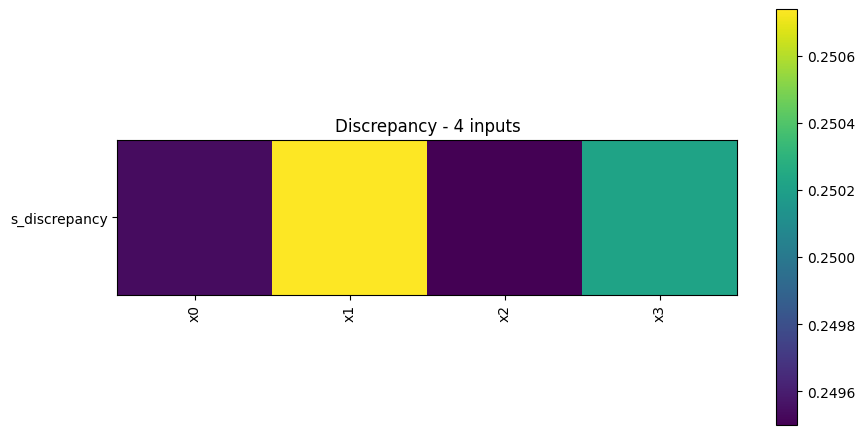

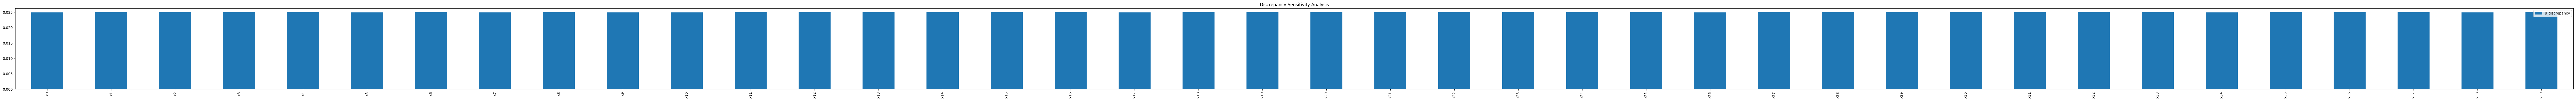

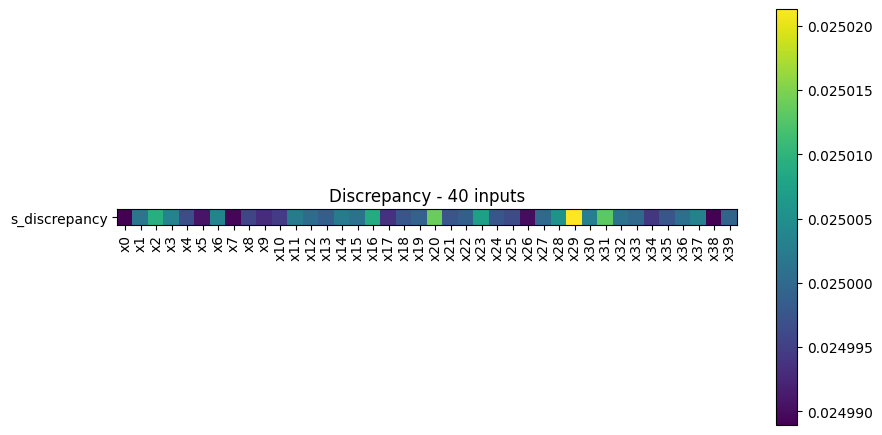

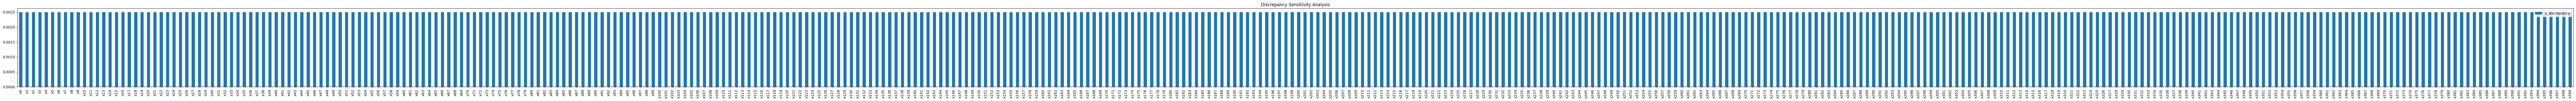

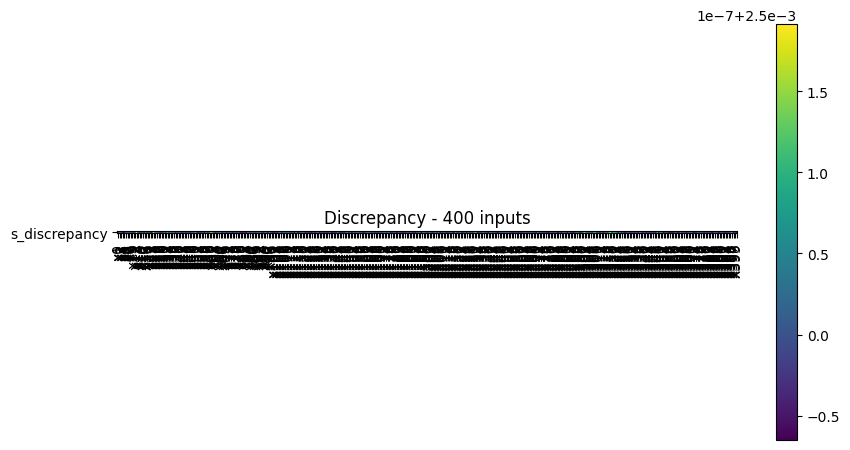

In [116]:
discrepancy_sobol_g(4, sp_param_4, a_arr=a_param_4, delta_arr=delta_param_4)
discrepancy_sobol_g(40, sp_param_40, a_arr=a_param_40, delta_arr=delta_param_40)
discrepancy_sobol_g(400, sp_param_400, a_arr=a_param_400, delta_arr=delta_param_400)